In [1]:
import pandas as pd
import gzip
#import pandas_profiling as pdp
from IPython.display import display
import dask.dataframe as dd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib as mpl
import matplotlib.patches as mpatches

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

%matplotlib inline
sns.set()
plt.rcParams['font.family'] = 'HGMaruGothicMPRO'
print(mpl.rcParams['font.family'])

['HGMaruGothicMPRO']


In [2]:
col_names = ["rental_id", "customer_id", "payment_id", "inventory_id", "store_id", "film_id", "category_id", "first_name", "last_name", "email", "address_id", "activebool", "create_date", "active",
             "rental_date", "return_date", "amount", "payment_date", "title", "description", "release_year", "language_id", "rental_duration", "rental_rate", "length", "replacement_cost", "rating", "name", "actor_id"]
df_members = pd.read_csv('OJT_DVD_customer7.csv', names=col_names)
df_members.isnull().sum()

rental_id               0
customer_id          1452
payment_id           1452
inventory_id            0
store_id                0
film_id              8018
category_id          8018
first_name              0
last_name               0
email                   0
address_id              0
activebool              0
create_date             0
active                  0
rental_date             0
return_date           183
amount               1452
payment_date         1452
title                8018
description          8018
release_year         8018
language_id          8018
rental_duration      8018
rental_rate          8018
length               8018
replacement_cost     8018
rating               8018
name                 8018
actor_id            16049
dtype: int64

In [3]:
df_members=df_members.drop(0)

# ratingをカテゴリ変数化

In [4]:
df_members=df_members.dropna(subset=['rating'])
df_members['rating']=df_members['rating'].astype('category')
rating=pd.get_dummies(df_members['rating'],drop_first=True, dummy_na=False)
df_members=df_members.drop(['rating'],axis=1)
df_members=pd.concat([df_members,rating],axis=1)
df_members=df_members.dropna(subset=['rental_duration'])


In [5]:
rating

,NC-17,PG,PG-13,R
4,1,0,0,0
5,1,0,0,0
8,0,0,1,0
10,0,0,1,0
11,0,0,1,0
13,0,0,0,0
15,0,0,0,1
16,0,0,1,0
17,1,0,0,0
18,1,0,0,0


In [6]:
df_members['rental_date']

4        2005-05-24 23:05:21
5        2005-05-24 23:08:07
8        2005-05-25 00:00:40
10       2005-05-25 00:09:02
11       2005-05-25 00:19:27
13       2005-05-25 00:31:15
15       2005-05-25 00:43:11
16       2005-05-25 01:06:36
17       2005-05-25 01:10:47
18       2005-05-25 01:17:24
21       2005-05-25 02:19:23
22       2005-05-25 02:40:21
23       2005-05-25 02:53:02
25       2005-05-25 03:36:50
26       2005-05-25 03:41:50
29       2005-05-25 04:01:32
30       2005-05-25 04:05:17
31       2005-05-25 04:06:21
32       2005-05-25 04:18:51
33       2005-05-25 04:19:28
35       2005-05-25 04:36:26
37       2005-05-25 04:47:44
38       2005-05-25 04:51:46
40       2005-05-25 05:12:29
41       2005-05-25 05:24:58
42       2005-05-25 05:39:25
43       2005-05-25 05:53:23
45       2005-05-25 06:04:08
46       2005-05-25 06:05:20
48       2005-05-25 06:39:35
                ...         
15988    2005-08-23 20:25:11
15992    2005-08-23 20:29:10
15993    2005-08-23 20:29:56
15995    2005-

In [7]:
df_members['rental_date']=pd.to_datetime(df_members['rental_date'],format='%Y-%m-%d')
df_members['return_date']=pd.to_datetime(df_members['return_date'],format='%Y-%m-%d')
df_members['payment_date']=pd.to_datetime(df_members['payment_date'],format='%Y-%m-%d')
df_members['create_date']=pd.to_datetime(df_members['create_date'],format='%Y-%m-%d')

df_members['customer_id']=df_members['customer_id'].astype('double')
df_members['rental_id']=df_members['rental_id'].astype('double')
df_members['payment_id']=df_members['payment_id'].astype('double')
df_members['inventory_id']=df_members['inventory_id'].astype('double')
df_members['film_id']=df_members['film_id'].astype('double')
df_members['inventory_id']=df_members['inventory_id'].astype('double')
df_members['category_id']=df_members['category_id'].astype('double')
df_members['address_id']=df_members['address_id'].astype('double')
df_members['language_id']=df_members['language_id'].astype('double')
#df_members['actor_id']=df_members['actor_id'].astype('double')

df_members['amount']=df_members['amount'].astype('double')
df_members['release_year']=df_members['release_year'].astype('double')


df_members['rental_duration']=df_members['rental_duration'].astype('double')
df_members['rental_rate']=df_members['rental_rate'].astype('double')
df_members['length']=df_members['length'].astype('double')
df_members['replacement_cost']=df_members['replacement_cost'].astype('double')


In [8]:
df_members.dtypes

rental_id                  float64
customer_id                float64
payment_id                 float64
inventory_id               float64
store_id                    object
film_id                    float64
category_id                float64
first_name                  object
last_name                   object
email                       object
address_id                 float64
activebool                  object
create_date         datetime64[ns]
active                      object
rental_date         datetime64[ns]
return_date         datetime64[ns]
amount                     float64
payment_date        datetime64[ns]
title                       object
description                 object
release_year               float64
language_id                float64
rental_duration            float64
rental_rate                float64
length                     float64
replacement_cost           float64
name                        object
actor_id                   float64
NC-17               

In [9]:
df_members_sum=df_members.groupby(df_members['customer_id']).sum()
df_members_sum=df_members_sum.reset_index()
df_members_sum.head()

ValueError: cannot insert customer_id, already exists

Text(0.5,1,'ユーザIDと合計値段の散布図')

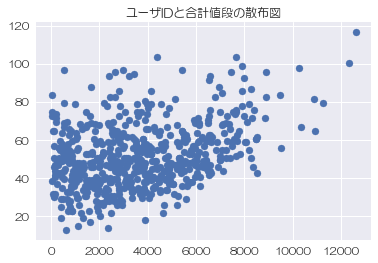

In [10]:
plt.scatter(x=df_members_sum['customer_id'],y=df_members_sum['amount'])
plt.title('ユーザIDと合計値段の散布図')

Text(0.5,1,'ユーザIDと合計値段の散布図')

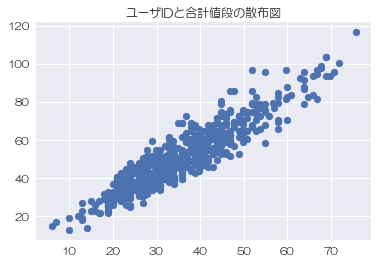

In [11]:
plt.scatter(x=df_members_sum['rental_rate'],y=df_members_sum['amount'])
plt.title('ユーザIDと合計値段の散布図')

In [12]:
customer_id_mean=df_members.groupby(df_members['customer_id']).mean()
customer_id_mean=customer_id_mean.reset_index()
customer_id_mean.head()

,customer_id,rental_id,payment_id,inventory_id,film_id,category_id,address_id,amount,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,actor_id,NC-17,PG,PG-13,R
0,1.0,7660.150000,23955.200000,2314.100000,505.600000,8.150000,5.0,4.190000,2006.0,1.0,5.000000,3.290000,124.000000,21.140000,NaN,0.250000,0.200000,0.250000,0.150000
1,2.0,9314.866667,25784.266667,2097.266667,457.933333,9.066667,6.0,4.856667,2006.0,1.0,4.800000,2.456667,125.266667,20.790000,NaN,0.266667,0.200000,0.133333,0.200000
2,3.0,8084.562500,25472.812500,2142.000000,468.687500,8.000000,7.0,4.677500,2006.0,1.0,5.125000,3.240000,111.937500,20.552500,NaN,0.000000,0.125000,0.250000,0.375000
3,4.0,8698.846154,22392.153846,1832.923077,400.692308,8.846154,8.0,2.990000,2006.0,1.0,4.769231,2.528462,118.923077,18.143846,NaN,0.076923,0.307692,0.153846,0.076923
4,5.0,9131.117647,25824.000000,1850.705882,404.882353,7.058824,9.0,3.813529,2006.0,1.0,5.058824,2.637059,123.294118,20.637059,NaN,0.176471,0.352941,0.176471,0.235294


Text(0.5,1,'ユーザIDと平均値段の散布図')

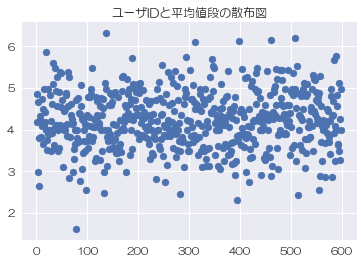

In [13]:
plt.scatter(x=customer_id_mean['customer_id'],y=customer_id_mean['amount'])
plt.title('ユーザIDと平均値段の散布図')

Text(0.5,1,'レンタル金額と一回の支払額の平均')

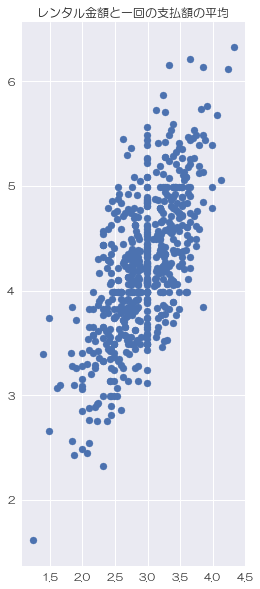

In [14]:
plt.figure(figsize=(4, 10))

plt.scatter(x=customer_id_mean['rental_rate'],y=customer_id_mean['amount'])
plt.title('レンタル金額と一回の支払額の平均')

In [15]:
df_members_rental_sum=df_members.groupby(pd.Grouper(key='rental_date',freq='1d')).sum()
df_members_rental_sum=df_members_rental_sum.reset_index()
df_members_rental_sum.head()

,rental_date,rental_id,customer_id,payment_id,inventory_id,film_id,category_id,address_id,amount,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,actor_id,NC-17,PG,PG-13,R
0,2005-05-24,12.0,0.0,0.0,5238.0,1143.0,16.0,915.0,0.0,6018.0,3.0,17.0,6.97,324.0,71.97,0.0,2,0,0,0
1,2005-05-25,4988.0,0.0,0.0,161662.0,35349.0,565.0,20526.0,0.0,140420.0,70.0,352.0,203.30,8020.0,1338.30,0.0,13,8,22,13
2,2005-05-26,20452.0,0.0,0.0,196115.0,42910.0,792.0,28221.0,0.0,178534.0,89.0,440.0,294.11,10425.0,1805.11,0.0,26,6,19,21
3,2005-05-27,36245.0,0.0,0.0,204967.0,44828.0,754.0,25352.0,0.0,180540.0,90.0,429.0,247.10,10850.0,1812.10,0.0,22,16,21,18
4,2005-05-28,54818.0,0.0,0.0,222612.0,48654.0,723.0,30823.0,0.0,186558.0,93.0,436.0,288.07,10123.0,1921.07,0.0,22,13,23,20


In [16]:
df_members_rental_sum=df_members.groupby(pd.Grouper(key='rental_date',freq='1d')).sum()
df_members_rental_sum=df_members_rental_sum.reset_index()
df_members_rental_sum.head()

,rental_date,rental_id,customer_id,payment_id,inventory_id,film_id,category_id,address_id,amount,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,actor_id,NC-17,PG,PG-13,R
0,2005-05-24,12.0,0.0,0.0,5238.0,1143.0,16.0,915.0,0.0,6018.0,3.0,17.0,6.97,324.0,71.97,0.0,2,0,0,0
1,2005-05-25,4988.0,0.0,0.0,161662.0,35349.0,565.0,20526.0,0.0,140420.0,70.0,352.0,203.30,8020.0,1338.30,0.0,13,8,22,13
2,2005-05-26,20452.0,0.0,0.0,196115.0,42910.0,792.0,28221.0,0.0,178534.0,89.0,440.0,294.11,10425.0,1805.11,0.0,26,6,19,21
3,2005-05-27,36245.0,0.0,0.0,204967.0,44828.0,754.0,25352.0,0.0,180540.0,90.0,429.0,247.10,10850.0,1812.10,0.0,22,16,21,18
4,2005-05-28,54818.0,0.0,0.0,222612.0,48654.0,723.0,30823.0,0.0,186558.0,93.0,436.0,288.07,10123.0,1921.07,0.0,22,13,23,20


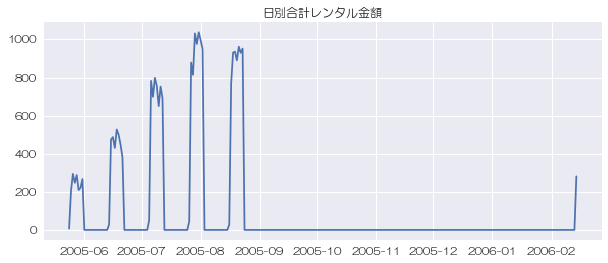

In [17]:
plt.figure(figsize=(10, 4))
plt.plot(df_members_rental_sum['rental_date'],df_members_rental_sum['rental_rate'])
plt.title('日別合計レンタル金額')
plt.savefig('日別合計レンタル金額')

In [18]:
df_members_return_sum=df_members.groupby(pd.Grouper(key='return_date',freq='1d')).count()
df_members_return_sum=df_members_return_sum.reset_index()
df_members_return_sum.head()

,return_date,rental_id,customer_id,payment_id,inventory_id,store_id,film_id,category_id,first_name,last_name,...,rental_duration,rental_rate,length,replacement_cost,name,actor_id,NC-17,PG,PG-13,R
0,2005-05-25,1,0,0,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
1,2005-05-26,7,0,0,7,7,7,7,7,7,...,7,7,7,7,7,0,7,7,7,7
2,2005-05-27,25,0,0,25,25,25,25,25,25,...,25,25,25,25,25,0,25,25,25,25
3,2005-05-28,26,0,0,26,26,26,26,26,26,...,26,26,26,26,26,0,26,26,26,26
4,2005-05-29,47,0,0,47,47,47,47,47,47,...,47,47,47,47,47,0,47,47,47,47


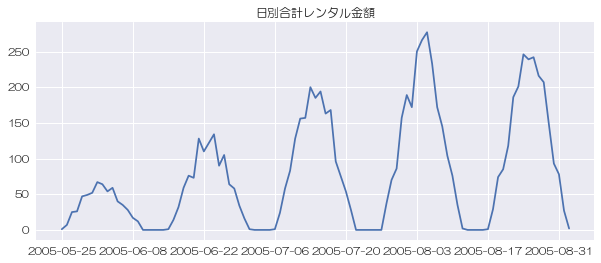

In [19]:
plt.figure(figsize=(10, 4))
plt.plot(df_members_return_sum['return_date'],df_members_return_sum['rental_rate'])
plt.title('日別合計レンタル金額')
plt.savefig('日別合計レンタル金額')

In [20]:
df_members_rental_count=df_members.groupby(pd.Grouper(key='rental_date',freq='1d')).count()
df_members_rental_count=df_members_rental_count.reset_index()
df_members_rental_count.head(10)

,rental_date,rental_id,customer_id,payment_id,inventory_id,store_id,film_id,category_id,first_name,last_name,...,rental_duration,rental_rate,length,replacement_cost,name,actor_id,NC-17,PG,PG-13,R
0,2005-05-24,3,0,0,3,3,3,3,3,3,...,3,3,3,3,3,0,3,3,3,3
1,2005-05-25,70,0,0,70,70,70,70,70,70,...,70,70,70,70,70,0,70,70,70,70
2,2005-05-26,89,0,0,89,89,89,89,89,89,...,89,89,89,89,89,0,89,89,89,89
3,2005-05-27,90,0,0,90,90,90,90,90,90,...,90,90,90,90,90,0,90,90,90,90
4,2005-05-28,93,0,0,93,93,93,93,93,93,...,93,93,93,93,93,0,93,93,93,93
5,2005-05-29,76,0,0,76,76,76,76,76,76,...,76,76,76,76,76,0,76,76,76,76
6,2005-05-30,78,0,0,78,78,78,78,78,78,...,78,78,78,78,78,0,78,78,78,78
7,2005-05-31,84,0,0,84,84,84,84,84,84,...,84,84,84,84,84,0,84,84,84,84
8,2005-06-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2005-06-02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


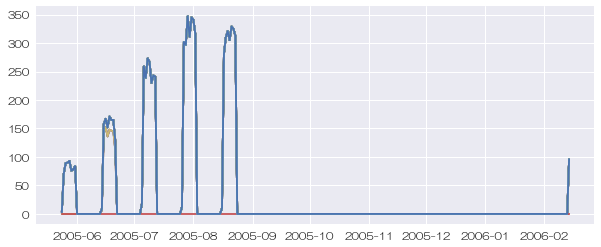

In [21]:
plt.figure(figsize=(10, 4))
A = df_members_rental_count.set_index('rental_date')
plt.plot(A)

In [22]:
df_name=df_members.groupby(pd.Grouper(key='name')).count()
df_name=df_name.reset_index()

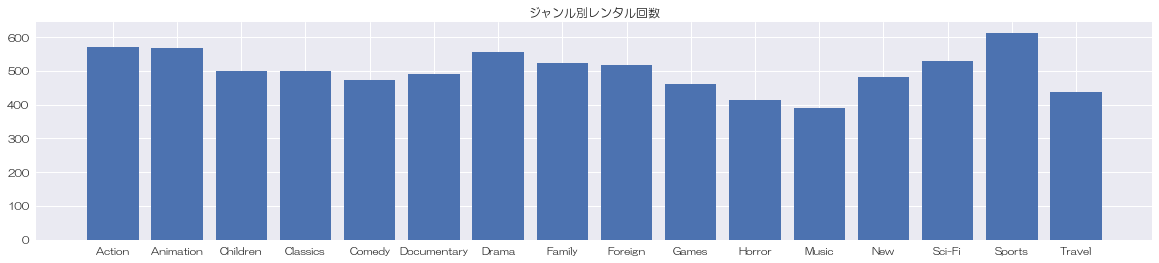

In [23]:
plt.figure(figsize=(20, 4))
plt.bar(df_name['name'],df_name['rental_rate'])
plt.title('ジャンル別レンタル回数')
plt.savefig('ジャンル別レンタル回数')

In [24]:
df_name.sort_index(by='active',ascending=True)

C:\Users\hiroyuki_ohkawa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


,name,rental_id,customer_id,payment_id,inventory_id,store_id,film_id,category_id,first_name,last_name,...,language_id,rental_duration,rental_rate,length,replacement_cost,actor_id,NC-17,PG,PG-13,R
5,Music,389,349,349,389,389,389,389,389,389,...,389,389,389,389,389,0,389,389,389,389
4,Horror,414,374,374,414,414,414,414,414,414,...,414,414,414,414,414,0,414,414,414,414
3,Travel,438,394,394,438,438,438,438,438,438,...,438,438,438,438,438,0,438,438,438,438
11,Games,460,412,412,460,460,460,460,460,460,...,460,460,460,460,460,0,460,460,460,460
1,Comedy,474,436,436,474,474,474,474,474,474,...,474,474,474,474,474,0,474,474,474,474
13,New,483,452,452,483,483,483,483,483,483,...,483,483,483,483,483,0,483,483,483,483
14,Documentary,492,436,436,492,492,492,492,492,492,...,492,492,492,492,492,0,492,492,492,492
0,Children,499,455,455,499,499,499,499,499,499,...,499,499,499,499,499,0,499,499,499,499
15,Classics,501,461,461,501,501,501,501,501,501,...,501,501,501,501,501,0,501,501,501,501
2,Foreign,517,478,478,517,517,517,517,517,517,...,517,517,517,517,517,0,517,517,517,517


In [25]:
df_name_sum=df_members.groupby(pd.Grouper(key='name')).sum()
#df_name_sum=df_name_sum.reset_index()
df_name_sum

,rental_id,customer_id,payment_id,inventory_id,film_id,category_id,address_id,amount,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,actor_id,NC-17,PG,PG-13,R
name,,,,,,,,,,,,,,,,,,,
Children,3889042.0,137261.0,11416964.0,1187796.0,259492.0,1497.0,152653.0,1779.45,1000994.0,499.0,2460.0,1344.01,55572.0,10213.01,0.0,120,90,104,92
Comedy,3823734.0,132584.0,10818234.0,1149280.0,251116.0,2370.0,146199.0,2130.63,950844.0,474.0,2256.0,1589.26,53775.0,9132.26,0.0,91,138,89,64
Foreign,4202710.0,145959.0,11777832.0,1192939.0,260600.0,4653.0,159569.0,1945.22,1037102.0,517.0,2639.0,1495.83,63450.0,9584.83,0.0,65,98,144,114
Travel,3341234.0,120445.0,9723500.0,1006848.0,220101.0,7008.0,136076.0,1653.06,878628.0,438.0,2392.0,1449.62,50079.0,8445.62,0.0,67,123,88,86
Horror,3314001.0,115481.0,9326399.0,946601.0,206938.0,4554.0,130462.0,1642.27,830484.0,414.0,2052.0,1301.86,47452.0,8195.86,0.0,42,92,121,105
Music,3064055.0,107738.0,8734344.0,814833.0,178190.0,4668.0,121640.0,1434.52,780334.0,389.0,2040.0,1175.11,45765.0,7430.11,0.0,172,68,54,90
Sci-Fi,4387159.0,143868.0,12122692.0,1055174.0,230781.0,7420.0,158269.0,2143.08,1063180.0,530.0,2562.0,1628.70,56259.0,11226.70,0.0,73,115,115,139
Animation,4679930.0,152315.0,12939003.0,1308413.0,285904.0,1138.0,168584.0,2041.81,1141414.0,569.0,2691.0,1533.31,62138.0,11394.31,0.0,119,89,166,78
Action,4457169.0,147773.0,12672516.0,1329776.0,290910.0,570.0,166742.0,2018.84,1143420.0,570.0,2785.0,1540.30,61975.0,12142.30,0.0,70,85,103,151


In [26]:
df_name_sum=df_name_sum.sort_values(by='rental_rate',ascending=False)

"\nplt.bar(df_name_sum['name'],df_name_sum['PG'])\nplt.bar(df_name_sum['name'],df_name_sum['PG-13'],bottom=df_name_sum['PG'],stacked=)\nplt.bar(df_name_sum['name'],df_name_sum['R'],bottom=df_name_sum['PG-13'])\nplt.bar(df_name_sum['name'],df_name_sum['NC-17'],bottom=df_name_sum['R'])\nplt.title('ジャンル別レンタル回数のレイティング割合')\n"

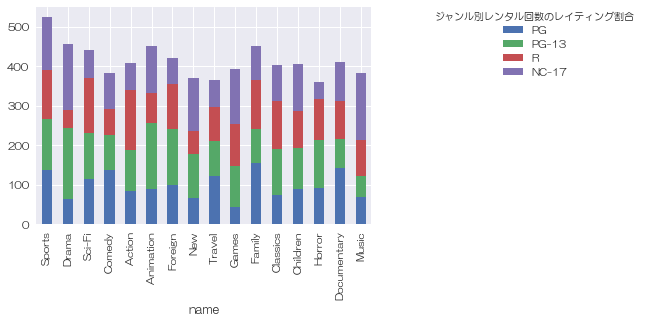

In [27]:
dfg=plt.figure(figsize=(20, 4))
dfg=df_name_sum[['PG','PG-13','R','NC-17']]
dfg.plot.bar(stacked=True)
plt.legend(loc='upper right',
           bbox_to_anchor=(1.5, 0.9, 0.3, .100), 
           borderaxespad=0,
          title='ジャンル別レンタル回数のレイティング割合')
plt.savefig('ジャンル別レンタル回数のレイティング割合_積み立て.png')
'''
plt.bar(df_name_sum['name'],df_name_sum['PG'])
plt.bar(df_name_sum['name'],df_name_sum['PG-13'],bottom=df_name_sum['PG'],stacked=)
plt.bar(df_name_sum['name'],df_name_sum['R'],bottom=df_name_sum['PG-13'])
plt.bar(df_name_sum['name'],df_name_sum['NC-17'],bottom=df_name_sum['R'])
plt.title('ジャンル別レンタル回数のレイティング割合')
'''

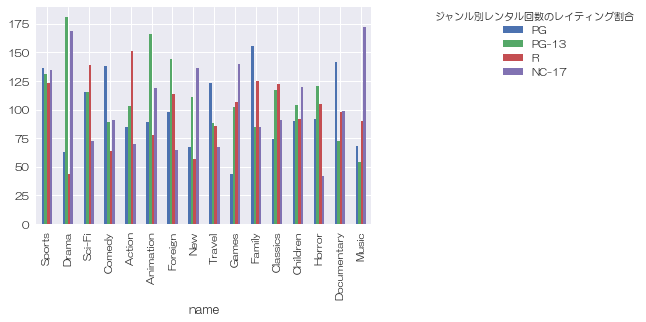

In [28]:
dfg=plt.figure(figsize=(20, 4))
dfg=df_name_sum[['PG','PG-13','R','NC-17']]
dfg.plot.bar()
plt.legend(loc='upper right',
           bbox_to_anchor=(1.5, 0.9, 0.3, .100), 
           borderaxespad=0,
          title='ジャンル別レンタル回数のレイティング割合')
plt.savefig('ジャンル別レンタル回数のレイティング割合_比較.png')

In [29]:
dfg=plt.figure(figsize=(20, 4))
dfg=df_name_mean[['PG','PG-13','R','NC-17']]
dfg.plot.bar(stacked=True)
plt.legend(loc='upper right',
           bbox_to_anchor=(1.5, 0.9, 0.3, .100), 
           borderaxespad=0,
          title='ジャンル別レンタル回数のレイティング割合')
plt.savefig('ジャンル別レンタル回数のレイティング割合_積み立て.png')
'''
plt.bar(df_name_sum['name'],df_name_sum['PG'])
plt.bar(df_name_sum['name'],df_name_sum['PG-13'],bottom=df_name_sum['PG'],stacked=)
plt.bar(df_name_sum['name'],df_name_sum['R'],bottom=df_name_sum['PG-13'])
plt.bar(df_name_sum['name'],df_name_sum['NC-17'],bottom=df_name_sum['R'])
plt.title('ジャンル別レンタル回数のレイティング割合')
'''

NameError: name 'df_name_mean' is not defined

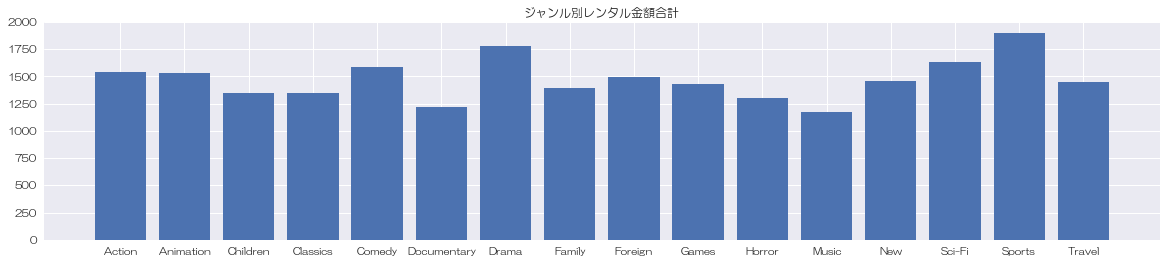

In [30]:
df_name_sum=df_name_sum.reset_index()
plt.figure(figsize=(20, 4))
plt.bar(df_name_sum['name'],df_name_sum['rental_rate'])
plt.title('ジャンル別レンタル金額合計')
plt.savefig('ジャンル別レンタル金額合計')

In [31]:
df_name_mean=df_members.groupby(pd.Grouper(key='name')).mean()
df_name_mean=df_name_mean.reset_index()

In [32]:
df_name_mean.sort_index(by='rental_rate',ascending=True)

C:\Users\hiroyuki_ohkawa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


,name,rental_id,customer_id,payment_id,inventory_id,film_id,category_id,address_id,amount,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,actor_id,NC-17,PG,PG-13,R
14,Documentary,8017.418699,280.825688,24809.541284,2391.878049,523.394309,6.0,287.642276,3.932683,2006.0,1.0,4.591463,2.485935,109.802846,20.990000,NaN,0.201220,0.288618,0.148374,0.199187
10,Family,8172.896947,297.616525,25079.332627,2195.083969,480.580153,8.0,305.354962,3.862881,2006.0,1.0,5.141221,2.654122,111.681298,19.699924,NaN,0.162214,0.297710,0.162214,0.238550
0,Children,7793.671343,301.672527,25092.228571,2380.352705,520.024048,3.0,305.917836,3.910879,2006.0,1.0,4.929860,2.693407,111.366733,20.466954,NaN,0.240481,0.180361,0.208417,0.184369
7,Animation,8224.833040,294.044402,24978.770270,2299.495606,502.467487,2.0,296.281195,3.941718,2006.0,1.0,4.729350,2.694745,109.205624,20.025149,NaN,0.209139,0.156415,0.291740,0.137083
15,Classics,8137.692615,283.926247,24298.685466,2342.119760,511.698603,4.0,289.323353,4.042017,2006.0,1.0,4.866267,2.698583,114.431138,21.179621,NaN,0.181637,0.147705,0.233533,0.243513
8,Action,7819.594737,287.496109,24654.700389,2332.940351,510.368421,1.0,292.529825,3.927704,2006.0,1.0,4.885965,2.702281,108.728070,21.302281,NaN,0.122807,0.149123,0.180702,0.264912
2,Foreign,8129.032882,305.353556,24639.815900,2307.425532,504.061896,9.0,308.644101,4.069498,2006.0,1.0,5.104449,2.893288,122.727273,18.539323,NaN,0.125725,0.189555,0.278530,0.220503
13,New,8504.643892,304.831858,24838.422566,2215.126294,484.768116,13.0,309.939959,4.594049,2006.0,1.0,4.486542,3.018986,110.337474,19.381304,NaN,0.281573,0.138716,0.229814,0.118012
5,Music,7876.748072,308.704871,25026.773639,2094.686375,458.071979,12.0,312.699229,4.110372,2006.0,1.0,5.244216,3.020848,117.647815,19.100540,NaN,0.442159,0.174807,0.138817,0.231362
6,Sci-Fi,8277.658491,293.010183,24689.800407,1990.894340,435.435849,14.0,298.620755,4.364725,2006.0,1.0,4.833962,3.073019,106.149057,21.182453,NaN,0.137736,0.216981,0.216981,0.262264


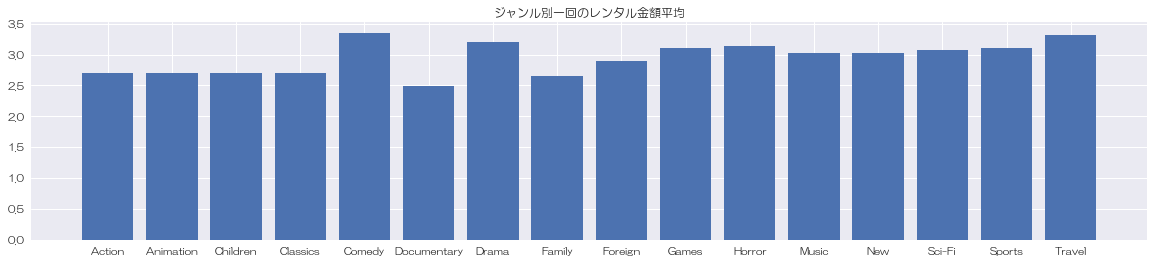

In [33]:
plt.figure(figsize=(20, 4))
plt.bar(df_name_mean['name'],df_name_mean['rental_rate'])
plt.title('ジャンル別一回のレンタル金額平均')
plt.savefig('ジャンル別一回のレンタル金額平均')

In [34]:
df_members_sum.corr()

,rental_id,customer_id,payment_id,inventory_id,film_id,category_id,address_id,amount,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,actor_id,NC-17,PG,PG-13,R
rental_id,1.000000,0.358069,0.853806,0.760756,0.761277,0.774930,0.362058,0.792456,0.895008,0.895008,0.858115,0.786750,0.856033,0.867296,NaN,0.306537,0.443555,0.375766,0.411704
customer_id,0.358069,1.000000,0.292414,0.336459,0.336571,0.369866,0.999956,0.373424,0.392370,0.392370,0.399605,0.387264,0.337749,0.343345,NaN,0.148997,0.204984,0.189941,0.160416
payment_id,0.853806,0.292414,1.000000,0.847081,0.847553,0.845248,0.296929,0.840066,0.967263,0.967263,0.925564,0.838483,0.921745,0.928959,NaN,0.351984,0.453009,0.385437,0.483928
inventory_id,0.760756,0.336459,0.847081,1.000000,0.999988,0.752103,0.340742,0.759839,0.874065,0.874065,0.846043,0.773847,0.846579,0.829344,NaN,0.334113,0.432733,0.348049,0.426056
film_id,0.761277,0.336571,0.847553,0.999988,1.000000,0.752695,0.340854,0.760368,0.874513,0.874513,0.846519,0.774266,0.846979,0.829962,NaN,0.334070,0.433237,0.348362,0.426035
category_id,0.774930,0.369866,0.845248,0.752103,0.752695,1.000000,0.373691,0.765547,0.866557,0.866557,0.834566,0.778358,0.825551,0.831302,NaN,0.358274,0.415971,0.339147,0.434421
address_id,0.362058,0.999956,0.296929,0.340742,0.340854,0.373691,1.000000,0.377290,0.396996,0.396996,0.404007,0.391255,0.342279,0.347865,NaN,0.150324,0.207100,0.191802,0.163043
amount,0.792456,0.373424,0.840066,0.759839,0.760368,0.765547,0.377290,1.000000,0.876203,0.876203,0.813494,0.923034,0.837832,0.839362,NaN,0.341604,0.391094,0.373690,0.410703
release_year,0.895008,0.392370,0.967263,0.874065,0.874513,0.866557,0.396996,0.876203,1.000000,1.000000,0.962564,0.877020,0.946839,0.960759,NaN,0.362887,0.483315,0.389037,0.483820
language_id,0.895008,0.392370,0.967263,0.874065,0.874513,0.866557,0.396996,0.876203,1.000000,1.000000,0.962564,0.877020,0.946839,0.960759,NaN,0.362887,0.483315,0.389037,0.483820


In [35]:
df_film_sum=df_members.groupby(pd.Grouper(key='film_id')).sum()
df_film_sum=df_film_sum.reset_index()
df_film_sum.sort_index(by='NC-17',ascending=False)

C:\Users\hiroyuki_ohkawa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


,film_id,rental_id,customer_id,payment_id,inventory_id,category_id,address_id,amount,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,actor_id,NC-17,PG,PG-13,R
253,1000.0,186510.0,5853.0,489623.0,109862.0,120.0,6390.0,152.79,48144.0,24.0,72.0,119.76,1200.0,455.76,0.0,24,0,0,0
128,767.0,138304.0,6250.0,486804.0,70041.0,240.0,6668.0,102.81,40120.0,20.0,120.0,99.80,3660.0,279.80,0.0,20,0,0,0
15,979.0,107039.0,4323.0,338188.0,85144.0,133.0,5618.0,81.86,38114.0,19.0,114.0,94.81,1900.0,208.81,0.0,19,0,0,0
42,397.0,127761.0,3960.0,384897.0,32907.0,252.0,4692.0,77.84,36108.0,18.0,90.0,53.82,1926.0,485.82,0.0,18,0,0,0
378,683.0,134356.0,5181.0,416261.0,55970.0,126.0,5810.0,93.84,36108.0,18.0,90.0,89.82,1080.0,359.82,0.0,18,0,0,0
330,172.0,133425.0,3725.0,459802.0,14150.0,126.0,4156.0,93.83,36108.0,18.0,126.0,89.82,2016.0,233.82,0.0,18,0,0,0
202,973.0,108540.0,3581.0,376993.0,80176.0,108.0,4447.0,102.85,36108.0,18.0,54.0,89.82,3294.0,503.82,0.0,18,0,0,0
426,843.0,169323.0,6219.0,391591.0,69325.0,72.0,6558.0,109.83,36108.0,18.0,72.0,89.82,2574.0,287.82,0.0,18,0,0,0
490,307.0,126608.0,4762.0,407310.0,23842.0,272.0,4840.0,97.83,34102.0,17.0,102.0,84.83,1309.0,169.83,0.0,17,0,0,0
44,471.0,142329.0,4497.0,346668.0,37075.0,68.0,5238.0,49.85,34102.0,17.0,119.0,50.83,1428.0,407.83,0.0,17,0,0,0


In [36]:
df_film_mean=df_members.groupby(pd.Grouper(key='film_id')).mean()
df_film_mean=df_film_mean.reset_index()
df_film_mean.sort_index(by='NC-17',ascending=False)

C:\Users\hiroyuki_ohkawa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


,film_id,rental_id,customer_id,payment_id,inventory_id,category_id,address_id,amount,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,actor_id,NC-17,PG,PG-13,R
0,450.0,6923.352941,280.933333,24722.800000,2076.176471,3.0,285.058824,3.656667,2006.0,1.0,5.0,2.99,84.0,29.99,NaN,1,0,0,0
148,334.0,7170.916667,375.600000,23423.500000,1528.500000,11.0,350.666667,5.390000,2006.0,1.0,6.0,4.99,65.0,21.99,NaN,1,0,0,0
750,66.0,8050.714286,357.285714,23058.142857,291.857143,3.0,362.285714,1.561429,2006.0,1.0,6.0,0.99,53.0,27.99,NaN,1,0,0,0
269,539.0,4974.000000,259.666667,24647.000000,2465.625000,7.0,267.750000,3.156667,2006.0,1.0,7.0,2.99,152.0,21.99,NaN,1,0,0,0
752,846.0,7995.500000,290.909091,26691.181818,3868.916667,13.0,294.166667,7.535455,2006.0,1.0,3.0,4.99,93.0,9.99,NaN,1,0,0,0
754,751.0,8469.500000,370.000000,20694.000000,3427.000000,13.0,375.000000,0.990000,2006.0,1.0,6.0,0.99,181.0,17.99,NaN,1,0,0,0
755,364.0,8988.666667,304.666667,22747.666667,1668.666667,13.0,309.333333,4.323333,2006.0,1.0,3.0,2.99,73.0,14.99,NaN,1,0,0,0
254,398.0,6075.500000,287.333333,22779.000000,1833.250000,12.0,237.250000,6.323333,2006.0,1.0,5.0,4.99,47.0,21.99,NaN,1,0,0,0
253,1000.0,7771.250000,278.714286,23315.380952,4577.583333,5.0,266.250000,7.275714,2006.0,1.0,3.0,4.99,50.0,18.99,NaN,1,0,0,0
766,436.0,9170.500000,383.700000,23873.900000,2002.300000,13.0,388.700000,3.290000,2006.0,1.0,4.0,0.99,122.0,14.99,NaN,1,0,0,0


# カテゴリーをダミー変数化

In [37]:
df_members['name']=df_members['name'].astype('category')
name=pd.get_dummies(df_members['name'],drop_first=True, dummy_na=True)
df_members=df_members.drop(['name'],axis=1)

df_members=pd.concat([name,df_members],axis=1)

In [38]:
df_members

,Animation,Children,Classics,Comedy,Documentary,Drama,Family,Foreign,Games,Horror,...,language_id,rental_duration,rental_rate,length,replacement_cost,actor_id,NC-17,PG,PG-13,R
4,0,1,0,0,0,0,0,0,0,0,...,1.0,5.0,2.99,84.0,29.99,NaN,1,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,1.0,5.0,0.99,92.0,19.99,NaN,1,0,0,0
8,0,0,0,0,0,0,0,1,0,0,...,1.0,6.0,4.99,56.0,9.99,NaN,0,0,1,0
10,0,0,0,0,0,0,0,1,0,0,...,1.0,4.0,4.99,109.0,11.99,NaN,0,0,1,0
11,0,0,0,0,0,0,0,0,0,0,...,1.0,7.0,4.99,119.0,17.99,NaN,0,0,1,0
13,0,0,0,0,0,0,0,0,0,1,...,1.0,6.0,0.99,158.0,13.99,NaN,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,1.0,6.0,4.99,121.0,11.99,NaN,0,0,0,1
16,0,0,0,0,0,0,0,0,0,0,...,1.0,7.0,2.99,166.0,10.99,NaN,0,0,1,0
17,0,0,0,0,0,0,0,0,0,0,...,1.0,7.0,0.99,81.0,28.99,NaN,1,0,0,0
18,0,0,0,0,0,0,0,0,0,0,...,1.0,7.0,4.99,136.0,25.99,NaN,1,0,0,0


In [39]:
df_members_rental_sum=df_members.groupby(pd.Grouper(key='rental_date',freq='1m')).sum()
df_members_rental_sum=df_members_rental_sum.reset_index()
df_members_rental_sum

,rental_date,Animation,Children,Classics,Comedy,Documentary,Drama,Family,Foreign,Games,...,language_id,rental_duration,rental_rate,length,replacement_cost,actor_id,NC-17,PG,PG-13,R
0,2005-05-31,37.0,37.0,31.0,34.0,44.0,42.0,41.0,34.0,42.0,...,583.0,2832.0,1737.17,67295.0,11885.17,0.0,142.0,94.0,129.0,126.0
1,2005-06-30,73.0,67.0,84.0,65.0,68.0,77.0,67.0,73.0,58.0,...,1117.0,5560.0,3275.83,129616.0,22244.83,0.0,227.0,230.0,242.0,232.0
2,2005-07-31,238.0,233.0,187.0,206.0,196.0,258.0,220.0,210.0,190.0,...,3384.0,16651.0,9960.16,390719.0,68364.16,0.0,690.0,666.0,768.0,649.0
3,2005-08-31,208.0,158.0,196.0,164.0,182.0,177.0,190.0,193.0,164.0,...,2850.0,13981.0,8341.50,327920.0,58209.50,0.0,590.0,572.0,625.0,571.0
4,2005-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0
5,2005-10-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0
6,2005-11-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0
7,2005-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0
8,2006-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0
9,2006-02-28,13.0,4.0,3.0,5.0,2.0,3.0,6.0,7.0,6.0,...,96.0,456.0,281.04,11000.0,1797.04,0.0,25.0,18.0,20.0,17.0


In [40]:
df_members.columns

Index([       'Animation',         'Children',         'Classics',
                 'Comedy',      'Documentary',            'Drama',
                 'Family',          'Foreign',            'Games',
                 'Horror',            'Music',              'New',
                 'Sci-Fi',           'Sports',           'Travel',
                      nan,        'rental_id',      'customer_id',
             'payment_id',     'inventory_id',         'store_id',
                'film_id',      'category_id',       'first_name',
              'last_name',            'email',       'address_id',
             'activebool',      'create_date',           'active',
            'rental_date',      'return_date',           'amount',
           'payment_date',            'title',      'description',
           'release_year',      'language_id',  'rental_duration',
            'rental_rate',           'length', 'replacement_cost',
               'actor_id',            'NC-17',               '

# ジャンル別レンタル回数折れ線グラフ

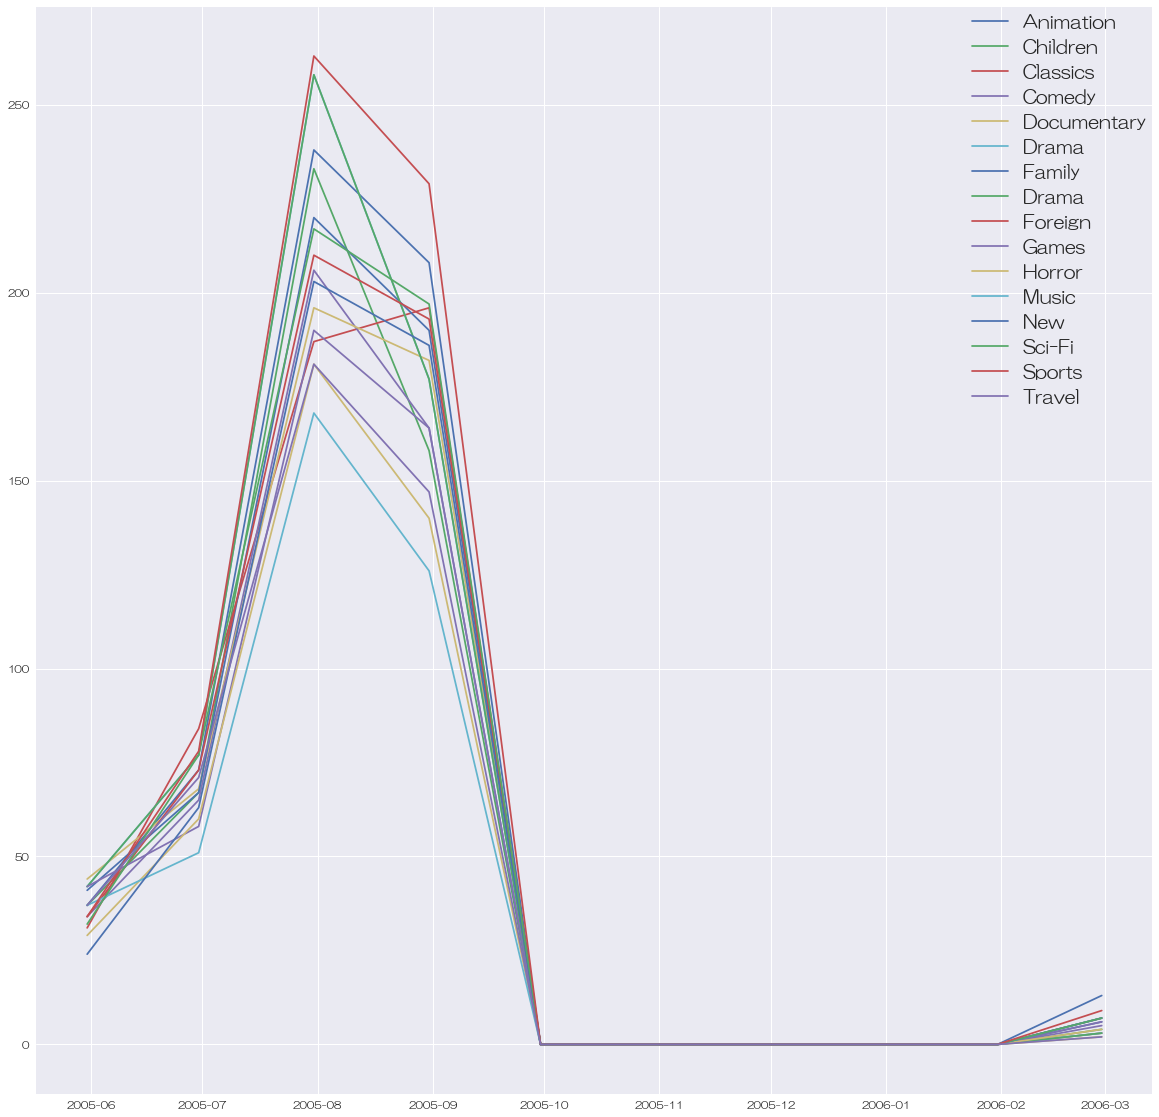

In [41]:
plt.figure(figsize=(20, 20))
plt.plot(df_members_rental_sum['rental_date'],df_members_rental_sum['Animation'],label='Animation')
plt.plot(df_members_rental_sum['rental_date'],df_members_rental_sum['Children'])
plt.plot(df_members_rental_sum['rental_date'],df_members_rental_sum['Classics'])
plt.plot(df_members_rental_sum['rental_date'],df_members_rental_sum['Comedy'])
plt.plot(df_members_rental_sum['rental_date'],df_members_rental_sum['Documentary'])
plt.plot(df_members_rental_sum['rental_date'],df_members_rental_sum['Drama'])
plt.plot(df_members_rental_sum['rental_date'],df_members_rental_sum['Family'])
plt.plot(df_members_rental_sum['rental_date'],df_members_rental_sum['Drama'])
plt.plot(df_members_rental_sum['rental_date'],df_members_rental_sum['Foreign'])
plt.plot(df_members_rental_sum['rental_date'],df_members_rental_sum['Games'])
plt.plot(df_members_rental_sum['rental_date'],df_members_rental_sum['Horror'])
plt.plot(df_members_rental_sum['rental_date'],df_members_rental_sum['Music'])
plt.plot(df_members_rental_sum['rental_date'],df_members_rental_sum['New'])
plt.plot(df_members_rental_sum['rental_date'],df_members_rental_sum['Sci-Fi'])
plt.plot(df_members_rental_sum['rental_date'],df_members_rental_sum['Sports'])
plt.plot(df_members_rental_sum['rental_date'],df_members_rental_sum['Travel'])

plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=18)

# ユーザIDごとに集計したDFバージョン2

In [42]:
df_members_sum = df_members.groupby(df_members['customer_id']).sum()
df_members_sum = df_members_sum.drop(labels=['customer_id','film_id','category_id','address_id','release_year','language_id','rental_id','payment_id','inventory_id','amount'],axis=1)
df_members_sum=df_members_sum.reset_index()
df_members_sum

ValueError: labels ['customer_id'] not contained in axis

# レンタル期間別に集計したDF

In [43]:
df_members_rental_duration_sum = df_members.groupby(pd.Grouper(key='rental_duration')).sum()
df_members_rental_duration_sum = df_members_rental_duration_sum.drop(labels=['customer_id','film_id','category_id','address_id','release_year','language_id','rental_id','payment_id','inventory_id','amount'],axis=1)
#df_members_rental_duration_sum=df_members_rental_duration_sum.reset_index()
df_members_rental_duration_sum = df_members_rental_duration_sum.sort_index()
df_members_rental_duration_sum

,Animation,Children,Classics,Comedy,Documentary,Drama,Family,Foreign,Games,Horror,...,Travel,nan,rental_rate,length,replacement_cost,actor_id,NC-17,PG,PG-13,R
rental_duration,,,,,,,,,,,,,,,,,,,,,
3.0,171.0,103.0,112.0,123.0,151.0,79.0,94.0,96.0,87.0,43.0,...,82.0,0.0,4669.71,194854.0,35428.71,0.0,301.0,323.0,317.0,362.0
4.0,116.0,84.0,115.0,105.0,98.0,126.0,75.0,109.0,95.0,152.0,...,56.0,0.0,4820.49,186036.0,33870.49,0.0,266.0,350.0,431.0,418.0
5.0,75.0,140.0,101.0,86.0,93.0,146.0,117.0,84.0,62.0,71.0,...,52.0,0.0,5134.02,184989.0,31635.02,0.0,364.0,266.0,314.0,349.0
6.0,110.0,89.0,74.0,83.0,101.0,100.0,139.0,101.0,143.0,76.0,...,74.0,0.0,4790.35,196439.0,33467.35,0.0,453.0,322.0,395.0,231.0
7.0,97.0,83.0,99.0,77.0,49.0,106.0,99.0,127.0,73.0,72.0,...,174.0,0.0,4181.13,164232.0,28099.13,0.0,290.0,319.0,327.0,235.0


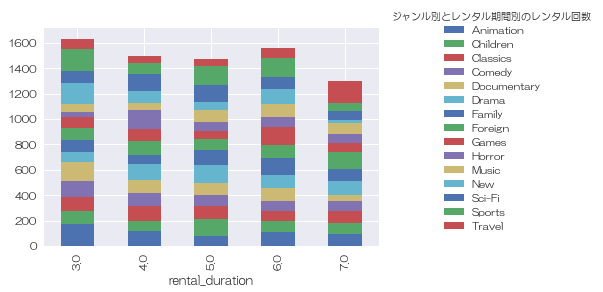

In [44]:
dfg=plt.figure(figsize=(20, 4))
dfg=df_members_rental_duration_sum[['Animation','Children','Classics','Comedy','Documentary','Drama','Family','Foreign','Games','Horror','Music','New','Sci-Fi','Sports','Travel']]
dfg.plot.bar(stacked=True)
plt.legend(loc='upper right',
           bbox_to_anchor=(1.35, 1.0, 0.3, .100), 
           borderaxespad=0,
          title='ジャンル別とレンタル期間別のレンタル回数')
plt.savefig('ジャンル別とレンタル期間別のレンタル回数.png')
#たぶん3日は新作とスポーツ系が多くて、4日はホラー系、5日はスポーツ系と子供系とドラマ系、6日はスポーツ系と家族系とゲーム系、7日はトラベル系が多い

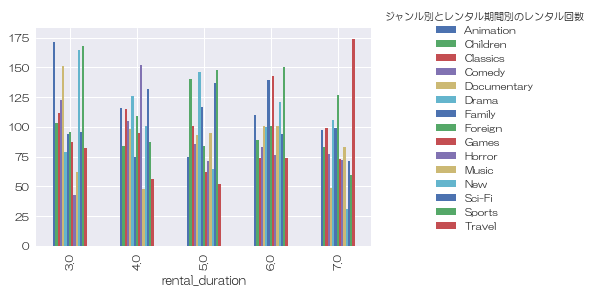

In [45]:
dfg=plt.figure(figsize=(20, 4))
dfg=df_members_rental_duration_sum[['Animation','Children','Classics','Comedy','Documentary','Drama','Family','Foreign','Games','Horror','Music','New','Sci-Fi','Sports','Travel']]
dfg.plot.bar()
plt.legend(loc='upper right',
           bbox_to_anchor=(1.35, 1, 0.3, .100), 
           borderaxespad=0,
          title='ジャンル別とレンタル期間別のレンタル回数')
plt.savefig('ジャンル別とレンタル期間別のレンタル回数.png')
#たぶん3日は新作とスポーツ系が多くて、4日はホラー系、5日はスポーツ系と子供系とドラマ系、6日はスポーツ系と家族系とゲーム系、7日はトラベル系が多い

In [46]:
df_members_rental_duration_sum

,Animation,Children,Classics,Comedy,Documentary,Drama,Family,Foreign,Games,Horror,...,Travel,nan,rental_rate,length,replacement_cost,actor_id,NC-17,PG,PG-13,R
rental_duration,,,,,,,,,,,,,,,,,,,,,
3.0,171.0,103.0,112.0,123.0,151.0,79.0,94.0,96.0,87.0,43.0,...,82.0,0.0,4669.71,194854.0,35428.71,0.0,301.0,323.0,317.0,362.0
4.0,116.0,84.0,115.0,105.0,98.0,126.0,75.0,109.0,95.0,152.0,...,56.0,0.0,4820.49,186036.0,33870.49,0.0,266.0,350.0,431.0,418.0
5.0,75.0,140.0,101.0,86.0,93.0,146.0,117.0,84.0,62.0,71.0,...,52.0,0.0,5134.02,184989.0,31635.02,0.0,364.0,266.0,314.0,349.0
6.0,110.0,89.0,74.0,83.0,101.0,100.0,139.0,101.0,143.0,76.0,...,74.0,0.0,4790.35,196439.0,33467.35,0.0,453.0,322.0,395.0,231.0
7.0,97.0,83.0,99.0,77.0,49.0,106.0,99.0,127.0,73.0,72.0,...,174.0,0.0,4181.13,164232.0,28099.13,0.0,290.0,319.0,327.0,235.0


# ユーザごとに何回借りているかを見る

In [47]:
df_members_rental_sum=df_members.groupby(['customer_id']).sum()
#df_members_rental_sum=df_members_rental_sum.reset_index()
df_members_rental_sum

,Animation,Children,Classics,Comedy,Documentary,Drama,Family,Foreign,Games,Horror,...,language_id,rental_duration,rental_rate,length,replacement_cost,actor_id,NC-17,PG,PG-13,R
customer_id,,,,,,,,,,,,,,,,,,,,,
1.0,1,0,3,3,0,2,0,1,0,0,...,20.0,100.0,65.80,2480.0,422.80,0.0,5,4,5,3
2.0,2,1,3,0,1,0,0,0,1,0,...,15.0,72.0,36.85,1879.0,311.85,0.0,4,3,2,3
3.0,2,0,1,2,1,1,1,0,1,1,...,16.0,82.0,51.84,1791.0,328.84,0.0,0,2,4,6
4.0,1,1,0,2,0,0,0,2,0,2,...,13.0,62.0,32.87,1546.0,235.87,0.0,1,4,2,1
5.0,2,0,4,1,0,1,2,1,1,0,...,17.0,86.0,44.83,2096.0,350.83,0.0,3,6,3,4
6.0,1,2,0,0,0,2,0,1,2,0,...,12.0,60.0,17.88,1194.0,266.88,0.0,3,2,3,3
7.0,1,0,0,1,1,0,2,0,0,1,...,15.0,69.0,42.85,1666.0,288.85,0.0,2,4,4,3
8.0,1,0,2,0,1,1,0,1,0,1,...,12.0,60.0,35.88,1689.0,223.88,0.0,3,3,2,1
9.0,0,0,2,0,0,0,0,2,0,2,...,12.0,66.0,41.88,1358.0,240.88,0.0,1,2,3,3


In [48]:
df_members_rental_sum.columns

Index([       'Animation',         'Children',         'Classics',
                 'Comedy',      'Documentary',            'Drama',
                 'Family',          'Foreign',            'Games',
                 'Horror',            'Music',              'New',
                 'Sci-Fi',           'Sports',           'Travel',
                      nan,        'rental_id',       'payment_id',
           'inventory_id',          'film_id',      'category_id',
             'address_id',           'amount',     'release_year',
            'language_id',  'rental_duration',      'rental_rate',
                 'length', 'replacement_cost',         'actor_id',
                  'NC-17',               'PG',            'PG-13',
                      'R'],
      dtype='object')

# 合計レンタル回数をカラムに追加

In [49]:
df_members_rental_sum['goukei']=df_members_rental_sum[ 'NC-17']+df_members_rental_sum['PG']+df_members_rental_sum['PG-13']+df_members_rental_sum['R']

# ヒストグラムでいろいろ出してみる

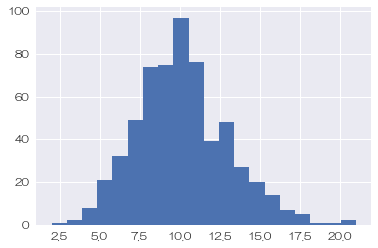

In [50]:
plt.hist(df_members_rental_sum['goukei'],bins=20)
plt.savefig('ユーザ別合計購入回数ヒストグラム')

(array([ 2.,  6.,  6., 19., 47., 62., 73., 72., 66., 61., 47., 50., 24.,
        24., 13.,  6.,  7.,  7.,  6.,  1.]),
 array([ 5.96,  9.45, 12.94, 16.43, 19.92, 23.41, 26.9 , 30.39, 33.88,
        37.37, 40.86, 44.35, 47.84, 51.33, 54.82, 58.31, 61.8 , 65.29,
        68.78, 72.27, 75.76]),
 <a list of 20 Patch objects>)

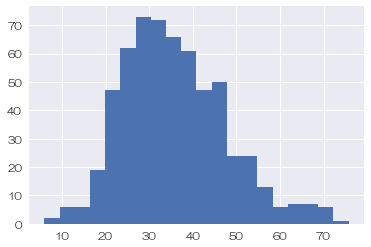

In [51]:
plt.hist(df_members_rental_sum['rental_rate'],bins=20)

(array([ 1.,  7.,  4., 13., 31., 59., 69., 73., 66., 63., 63., 44., 37.,
        26., 15., 14.,  6.,  3.,  3.,  2.]),
 array([ 12. ,  17.4,  22.8,  28.2,  33.6,  39. ,  44.4,  49.8,  55.2,
         60.6,  66. ,  71.4,  76.8,  82.2,  87.6,  93. ,  98.4, 103.8,
        109.2, 114.6, 120. ]),
 <a list of 20 Patch objects>)

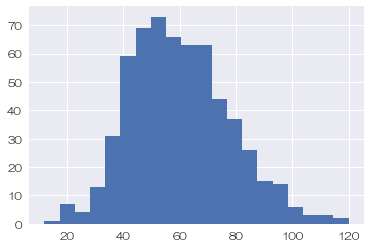

In [52]:
plt.hist(df_members_rental_sum['rental_duration'],bins=20)

In [53]:
df_members_rental_sum['goukei'].mean()
#df_members_rental_sum['nissu']=df_members_rental_sum['nissu'].round()

10.078464106844741

In [54]:
df_members_rental_sum_goukei1 = df_members_rental_sum[df_members_rental_sum['goukei']<df_members_rental_sum['goukei'].mean()]
df_members_rental_sum_goukei1.head()

,Animation,Children,Classics,Comedy,Documentary,Drama,Family,Foreign,Games,Horror,...,rental_duration,rental_rate,length,replacement_cost,actor_id,NC-17,PG,PG-13,R,goukei
customer_id,,,,,,,,,,,,,,,,,,,,,
4.0,1,1,0,2,0,0,0,2,0,2,...,62.0,32.87,1546.0,235.87,0.0,1,4,2,1,8
8.0,1,0,2,0,1,1,0,1,0,1,...,60.0,35.88,1689.0,223.88,0.0,3,3,2,1,9
9.0,0,0,2,0,0,0,0,2,0,2,...,66.0,41.88,1358.0,240.88,0.0,1,2,3,3,9
10.0,0,0,0,1,2,1,0,1,2,0,...,64.0,31.88,1233.0,253.88,0.0,2,2,1,5,10
12.0,0,0,2,1,0,3,0,0,0,2,...,66.0,31.88,1447.0,260.88,0.0,3,2,2,2,9


In [55]:
df_members_rental_sum_goukei2 = df_members_rental_sum[df_members_rental_sum['goukei'] > df_members_rental_sum['goukei'].mean()]
df_members_rental_sum_goukei2.head()

,Animation,Children,Classics,Comedy,Documentary,Drama,Family,Foreign,Games,Horror,...,rental_duration,rental_rate,length,replacement_cost,actor_id,NC-17,PG,PG-13,R,goukei
customer_id,,,,,,,,,,,,,,,,,,,,,
1.0,1,0,3,3,0,2,0,1,0,0,...,100.0,65.80,2480.0,422.80,0.0,5,4,5,3,17
2.0,2,1,3,0,1,0,0,0,1,0,...,72.0,36.85,1879.0,311.85,0.0,4,3,2,3,12
3.0,2,0,1,2,1,1,1,0,1,1,...,82.0,51.84,1791.0,328.84,0.0,0,2,4,6,12
5.0,2,0,4,1,0,1,2,1,1,0,...,86.0,44.83,2096.0,350.83,0.0,3,6,3,4,16
6.0,1,2,0,0,0,2,0,1,2,0,...,60.0,17.88,1194.0,266.88,0.0,3,2,3,3,11


In [56]:
df_members['rental_duration'].mean(),df_members['rental_duration'].median(),df_members['rental_duration'].min(),df_members['rental_duration'].max()

(4.916562889165629, 5.0, 3.0, 7.0)

In [57]:
(df_members['return_date'] - df_members['rental_date']).mean(),(df_members['return_date'] - df_members['rental_date']).median(),(df_members['return_date'] - df_members['rental_date']).max(),(df_members['return_date'] - df_members['rental_date']).min()

(Timedelta('5 days 01:05:31.391479'),
 Timedelta('5 days 01:01:30'),
 Timedelta('9 days 05:59:00'),
 Timedelta('0 days 18:00:00'))

In [58]:
df_members2=df_members
df_members2['nissu']=(df_members['return_date'] - df_members['rental_date'])

In [59]:
labels = ['借りている回数が平均より少ない人', '借りている回数が平均より多い人']

plt.hist([df_members_rental_sum_goukei1['nissu'],df_members_rental_sum_goukei2['nissu']], histtype="barstacked",label=labels)
plt.legend()
plt.savefig('借りている回数が平均より多い人と少ない人に分けた時のレンタル日と返却日の差のヒストグラム')

KeyError: 'nissu'

In [60]:
df_members2 = df_members.set_index(['customer_id','rental_id','film_id'], drop=True)


In [61]:
df_members2

Animation  Children  Classics  Comedy  \
customer_id rental_id film_id                                          
NaN         5.0       450.0            0         1         0       0   
            6.0       613.0            0         0         0       1   
            9.0       565.0            0         0         0       0   
            11.0      971.0            0         0         0       0   
            12.0      347.0            0         0         0       0   
            14.0      593.0            0         0         0       0   
            16.0      86.0             0         0         0       0   
            17.0      181.0            0         0         0       0   
            18.0      741.0            0         0         0       0   
            19.0      422.0            0         0         0       0   
            22.0      159.0            0         0         0       1   
            23.0      971.0            0         0         0       0   
            24.0      721.0            0         0         0       0   
            26.0      953.0            1         0         0       0   
            27.0      271.0            0         0         0       0   
            30.0      819.0            0         0         0       0   
            31.0      979.0            0         0         0       0   
            32.0      839.0            0         0         0       0   
            33.0      367.0            0         0         0       0   
            34.0      573.0            0         1         0       0   
            36.0      288.0            0         0         0       0   
            38.0      557.0            0         0         0       0   
            39.0      976.0            0         0         0       0   
            41.0      382.0            0         0         0       0   
            42.0      84.0             0         0         0       0   
            43.0      564.0            1         0         0       0   
            44.0      681.0            0         0         0       0   
            46.0      730.0            0         0         0       0   
            47.0      478.0            0         0         0       1   
            49.0      650.0            0         0         0       0   
...                                  ...       ...       ...     ...   
512.0       15990.0   710.0            0         0         0       0   
595.0       15994.0   97.0             0         0         0       0   
377.0       15995.0   249.0            0         0         1       0   
447.0       15997.0   624.0            0         0         0       0   
377.0       15999.0   567.0            0         0         0       0   
108.0       16001.0   55.0             0         0         0       0   
73.0        16002.0   608.0            0         1         0       0   
466.0       16005.0   719.0            0         0         0       0   
126.0       16007.0   710.0            0         0         0       0   
189.0       16008.0   721.0            0         0         0       0   
173.0       16010.0   557.0            0         0         0       0   
80.0        16012.0   528.0            0         0         0       0   
532.0       16014.0   730.0            0         0         0       0   
311.0       16020.0   61.0             0         0         0       0   
314.0       16021.0   672.0            0         0         0       1   
124.0       16023.0   511.0            0         0         0       0   
473.0       16024.0   639.0            0         0         0       0   
569.0       16025.0   385.0            0         0         0       1   
484.0       16026.0   103.0            0         0         0       0   
102.0       16031.0   402.0            1         0         0       0   
447.0       16032.0   555.0            0         0         0       1   
502.0       16034.0   142.0            0         0         0       0   
172.0       16038.0   573.0            0         1         0       0   

In [62]:
df_members['rental_duration'].value_counts()

3.0    1729
6.0    1665
4.0    1651
5.0    1598
7.0    1387
Name: rental_duration, dtype: int64

# ある等級をよく見る人はどんなジャンルを見るのか

In [63]:
df_members_rental_mean=df_members.groupby(['customer_id']).mean()
df_members_rental_mean=df_members_rental_mean.reset_index()
df_members_rental_mean=df_members_rental_mean.drop(labels=(['rental_id','payment_id','inventory_id','film_id','category_id','address_id','actor_id','release_year','language_id','address_id']),axis=1)

In [64]:
df_members_rental_sum=df_members.groupby(['customer_id']).sum()
df_members_rental_sum=df_members_rental_sum.reset_index()
df_members_rental_sum=df_members_rental_sum.drop(labels=(['rental_id','payment_id','inventory_id','film_id','category_id','address_id','actor_id','release_year','language_id','address_id']),axis=1)

In [65]:
df_members_rental_sum

,customer_id,Animation,Children,Classics,Comedy,Documentary,Drama,Family,Foreign,Games,...,nan,amount,rental_duration,rental_rate,length,replacement_cost,NC-17,PG,PG-13,R
0,1.0,1,0,3,3,0,2,0,1,0,...,0,83.80,100.0,65.80,2480.0,422.80,5,4,5,3
1,2.0,2,1,3,0,1,0,0,0,1,...,0,72.85,72.0,36.85,1879.0,311.85,4,3,2,3
2,3.0,2,0,1,2,1,1,1,0,1,...,0,74.84,82.0,51.84,1791.0,328.84,0,2,4,6
3,4.0,1,1,0,2,0,0,0,2,0,...,0,38.87,62.0,32.87,1546.0,235.87,1,4,2,1
4,5.0,2,0,4,1,0,1,2,1,1,...,0,64.83,86.0,44.83,2096.0,350.83,3,6,3,4
5,6.0,1,2,0,0,0,2,0,1,2,...,0,31.88,60.0,17.88,1194.0,266.88,3,2,3,3
6,7.0,1,0,0,1,1,0,2,0,0,...,0,64.85,69.0,42.85,1666.0,288.85,2,4,4,3
7,8.0,1,0,2,0,1,1,0,1,0,...,0,50.88,60.0,35.88,1689.0,223.88,3,3,2,1
8,9.0,0,0,2,0,0,0,0,2,0,...,0,45.88,66.0,41.88,1358.0,240.88,1,2,3,3
9,10.0,0,0,0,1,2,1,0,1,2,...,0,56.88,64.0,31.88,1233.0,253.88,2,2,1,5


In [66]:
df_members_rental_sum['PG'].mean(),df_members_rental_sum['PG-13'].mean(),df_members_rental_sum['R'].mean(),df_members_rental_sum['NC-17'].mean()

(2.4373956594323873, 2.714524207011686, 2.3989983305509184, 2.5275459098497497)

In [67]:
df_members_rental_sum['PG'].median(),df_members_rental_sum['PG-13'].median(),df_members_rental_sum['R'].median(),df_members_rental_sum['NC-17'].median()

(2.0, 3.0, 2.0, 2.0)

In [68]:
df_members_rental_sum_PG=df_members_rental_sum[df_members_rental_sum['PG']>df_members_rental_sum['PG'].median()]

In [69]:
df_members_rental_sum_PG_13=df_members_rental_sum[df_members_rental_sum['PG-13']>df_members_rental_sum['PG-13'].median()]

In [70]:
df_members_rental_sum_R=df_members_rental_sum[df_members_rental_sum['R']>df_members_rental_sum['R'].median()]

In [71]:
df_members_rental_sum_NC_17=df_members_rental_sum[df_members_rental_sum['NC-17']>df_members_rental_sum['NC-17'].median()]

In [72]:
display(df_members_rental_sum_PG)
display(df_members_rental_sum_PG_13)
display(df_members_rental_sum_R)
display(df_members_rental_sum_NC_17)


,customer_id,Animation,Children,Classics,Comedy,Documentary,Drama,Family,Foreign,Games,...,nan,amount,rental_duration,rental_rate,length,replacement_cost,NC-17,PG,PG-13,R
0,1.0,1,0,3,3,0,2,0,1,0,...,0,83.80,100.0,65.80,2480.0,422.80,5,4,5,3
1,2.0,2,1,3,0,1,0,0,0,1,...,0,72.85,72.0,36.85,1879.0,311.85,4,3,2,3
3,4.0,1,1,0,2,0,0,0,2,0,...,0,38.87,62.0,32.87,1546.0,235.87,1,4,2,1
4,5.0,2,0,4,1,0,1,2,1,1,...,0,64.83,86.0,44.83,2096.0,350.83,3,6,3,4
6,7.0,1,0,0,1,1,0,2,0,0,...,0,64.85,69.0,42.85,1666.0,288.85,2,4,4,3
7,8.0,1,0,2,0,1,1,0,1,0,...,0,50.88,60.0,35.88,1689.0,223.88,3,3,2,1
12,13.0,1,0,2,1,0,1,0,1,0,...,0,71.84,73.0,45.84,1767.0,345.84,2,4,2,4
19,20.0,1,2,1,2,0,0,0,1,0,...,0,48.87,70.0,34.87,1518.0,256.87,1,3,2,4
20,21.0,1,0,1,1,2,1,0,2,1,...,0,59.83,94.0,40.83,2085.0,348.83,3,6,3,2
22,23.0,1,0,2,1,0,0,0,0,1,...,0,42.89,51.0,24.89,1432.0,233.89,0,4,4,3


,customer_id,Animation,Children,Classics,Comedy,Documentary,Drama,Family,Foreign,Games,...,nan,amount,rental_duration,rental_rate,length,replacement_cost,NC-17,PG,PG-13,R
0,1.0,1,0,3,3,0,2,0,1,0,...,0,83.80,100.0,65.80,2480.0,422.80,5,4,5,3
2,3.0,2,0,1,2,1,1,1,0,1,...,0,74.84,82.0,51.84,1791.0,328.84,0,2,4,6
6,7.0,1,0,0,1,1,0,2,0,0,...,0,64.85,69.0,42.85,1666.0,288.85,2,4,4,3
10,11.0,1,2,1,0,3,0,0,0,5,...,0,73.82,89.0,45.82,2275.0,347.82,5,1,4,5
13,14.0,0,2,1,1,2,0,0,1,1,...,0,40.90,48.0,33.90,1163.0,217.90,3,2,4,1
15,16.0,2,1,0,1,0,0,2,0,1,...,0,41.90,46.0,27.90,1285.0,176.90,2,0,5,3
22,23.0,1,0,2,1,0,0,0,0,1,...,0,42.89,51.0,24.89,1432.0,233.89,0,4,4,3
25,26.0,0,1,1,0,4,4,1,2,1,...,0,96.80,85.0,51.80,2689.0,429.80,5,4,4,4
26,27.0,1,2,3,1,0,0,1,1,0,...,0,63.84,73.0,45.84,1829.0,322.84,2,4,4,0
28,29.0,1,3,1,0,1,1,0,2,4,...,0,79.81,93.0,56.81,2150.0,422.81,2,3,6,3


,customer_id,Animation,Children,Classics,Comedy,Documentary,Drama,Family,Foreign,Games,...,nan,amount,rental_duration,rental_rate,length,replacement_cost,NC-17,PG,PG-13,R
0,1.0,1,0,3,3,0,2,0,1,0,...,0,83.80,100.0,65.80,2480.0,422.80,5,4,5,3
1,2.0,2,1,3,0,1,0,0,0,1,...,0,72.85,72.0,36.85,1879.0,311.85,4,3,2,3
2,3.0,2,0,1,2,1,1,1,0,1,...,0,74.84,82.0,51.84,1791.0,328.84,0,2,4,6
4,5.0,2,0,4,1,0,1,2,1,1,...,0,64.83,86.0,44.83,2096.0,350.83,3,6,3,4
5,6.0,1,2,0,0,0,2,0,1,2,...,0,31.88,60.0,17.88,1194.0,266.88,3,2,3,3
6,7.0,1,0,0,1,1,0,2,0,0,...,0,64.85,69.0,42.85,1666.0,288.85,2,4,4,3
8,9.0,0,0,2,0,0,0,0,2,0,...,0,45.88,66.0,41.88,1358.0,240.88,1,2,3,3
9,10.0,0,0,0,1,2,1,0,1,2,...,0,56.88,64.0,31.88,1233.0,253.88,2,2,1,5
10,11.0,1,2,1,0,3,0,0,0,5,...,0,73.82,89.0,45.82,2275.0,347.82,5,1,4,5
12,13.0,1,0,2,1,0,1,0,1,0,...,0,71.84,73.0,45.84,1767.0,345.84,2,4,2,4


,customer_id,Animation,Children,Classics,Comedy,Documentary,Drama,Family,Foreign,Games,...,nan,amount,rental_duration,rental_rate,length,replacement_cost,NC-17,PG,PG-13,R
0,1.0,1,0,3,3,0,2,0,1,0,...,0,83.80,100.0,65.80,2480.0,422.80,5,4,5,3
1,2.0,2,1,3,0,1,0,0,0,1,...,0,72.85,72.0,36.85,1879.0,311.85,4,3,2,3
4,5.0,2,0,4,1,0,1,2,1,1,...,0,64.83,86.0,44.83,2096.0,350.83,3,6,3,4
5,6.0,1,2,0,0,0,2,0,1,2,...,0,31.88,60.0,17.88,1194.0,266.88,3,2,3,3
7,8.0,1,0,2,0,1,1,0,1,0,...,0,50.88,60.0,35.88,1689.0,223.88,3,3,2,1
10,11.0,1,2,1,0,3,0,0,0,5,...,0,73.82,89.0,45.82,2275.0,347.82,5,1,4,5
11,12.0,0,0,2,1,0,3,0,0,0,...,0,43.88,66.0,31.88,1447.0,260.88,3,2,2,2
13,14.0,0,2,1,1,2,0,0,1,1,...,0,40.90,48.0,33.90,1163.0,217.90,3,2,4,1
14,15.0,0,0,2,2,1,1,1,3,0,...,0,69.85,70.0,47.86,1766.0,309.86,3,1,3,4
20,21.0,1,0,1,1,2,1,0,2,1,...,0,59.83,94.0,40.83,2085.0,348.83,3,6,3,2


In [73]:
col_names = ["rental_id","customer_id","payment_id","inventory_id","store_id","film_id","category_id","first_name","last_name","email","address_id","activebool","create_date","active","rental_date","return_date","amount","payment_date","title","description","release_year","language_id","rental_duration","rental_rate","length","replacement_cost","rating","name","actor_id"]
df_members3 = pd.read_csv('OJT_DVD_customer7.csv',names=col_names )
df_members3.isnull().sum()
df_members3=df_members3.drop(0)
df_members3=df_members3.dropna(subset=['rating'])
df_members3['rating']=df_members3['rating'].astype('category')
rating=pd.get_dummies(df_members3['rating'],drop_first=True, dummy_na=False)
df_members3=df_members3.drop(['rating'],axis=1)
df_members3=pd.concat([df_members3,rating],axis=1)
df_members3=df_members3.dropna(subset=['rental_duration'])
df_members3['rental_date']=pd.to_datetime(df_members3['rental_date'],format='%Y-%m-%d')
df_members3['return_date']=pd.to_datetime(df_members3['return_date'],format='%Y-%m-%d')
df_members3['payment_date']=pd.to_datetime(df_members3['payment_date'],format='%Y-%m-%d')
df_members3['create_date']=pd.to_datetime(df_members3['create_date'],format='%Y-%m-%d')

df_members3['customer_id']=df_members3['customer_id'].astype('double')
df_members3['rental_id']=df_members3['rental_id'].astype('double')
df_members3['payment_id']=df_members3['payment_id'].astype('double')
df_members3['inventory_id']=df_members3['inventory_id'].astype('double')
df_members3['film_id']=df_members3['film_id'].astype('double')
df_members3['inventory_id']=df_members3['inventory_id'].astype('double')
df_members3['category_id']=df_members3['category_id'].astype('double')
df_members3['address_id']=df_members3['address_id'].astype('double')
df_members3['language_id']=df_members3['language_id'].astype('double')
#df_members['actor_id']=df_members['actor_id'].astype('double')

df_members3['amount']=df_members3['amount'].astype('double')
df_members3['release_year']=df_members3['release_year'].astype('double')


df_members3['rental_duration']=df_members3['rental_duration'].astype('double')
df_members3['rental_rate']=df_members3['rental_rate'].astype('double')
df_members3['length']=df_members3['length'].astype('double')
df_members3['replacement_cost']=df_members3['replacement_cost'].astype('double')


In [74]:
PG_customer=df_members_rental_sum_PG['customer_id'].values.tolist()
PG_customer=pd.DataFrame(PG_customer)
PG_customer=PG_customer.rename(columns={0: 'customer_id'})
PG_customer=pd.merge(df_members3,PG_customer)

PG_13_customer=df_members_rental_sum_PG_13['customer_id'].values.tolist()
PG_13_customer=pd.DataFrame(PG_13_customer)
PG_13_customer=PG_13_customer.rename(columns={0: 'customer_id'})
PG_13_customer=pd.merge(df_members3,PG_13_customer)

R_customer=df_members_rental_sum_R['customer_id'].values.tolist()
R_customer=pd.DataFrame(R_customer)
R_customer=R_customer.rename(columns={0: 'customer_id'})
R_customer=pd.merge(df_members3,R_customer)

NC_17_customer=df_members_rental_sum_NC_17['customer_id'].values.tolist()
NC_17_customer=pd.DataFrame(NC_17_customer)
NC_17_customer=NC_17_customer.rename(columns={0: 'customer_id'})
NC_17_customer=pd.merge(df_members3,NC_17_customer)

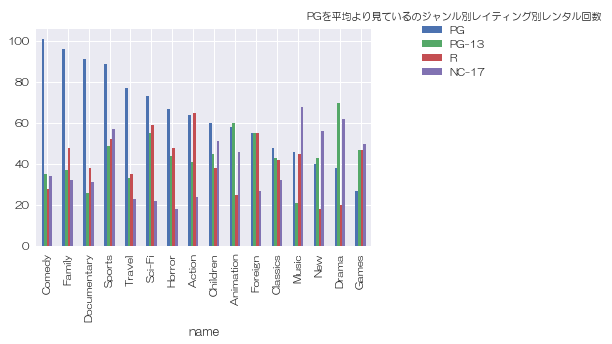

In [75]:
PG_customer=PG_customer.groupby(pd.Grouper(key='name')).sum()
PG_customer=PG_customer.sort_values(by='PG',ascending=False)

dfg=plt.figure(figsize=(20, 4))
dfg=PG_customer[['PG','PG-13','R','NC-17']]
dfg.plot.bar(stacked=False)
plt.legend(loc='upper right',
           bbox_to_anchor=(1.4, 1, 0.3, .100), 
           borderaxespad=0,
          title='PGを平均より見ているのジャンル別レイティング別レンタル回数')
#plt.savefig('PGを平均より見ているのジャンル別レンタル回数のレイティング割合.png')

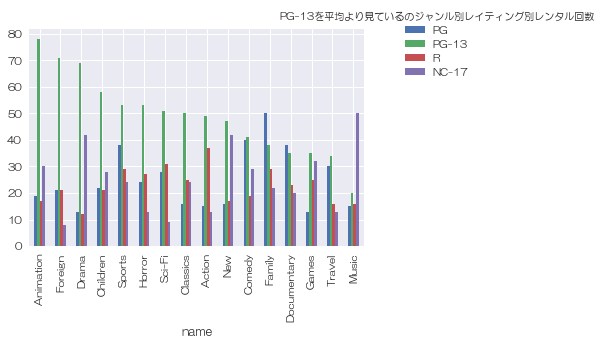

In [76]:
PG_13_customer=PG_13_customer.groupby(pd.Grouper(key='name')).sum()
PG_13_customer=PG_13_customer.sort_values(by='PG-13',ascending=False)

dfg=plt.figure(figsize=(20, 4))
dfg=PG_13_customer[['PG','PG-13','R','NC-17']]
dfg.plot.bar(stacked=False)
plt.legend(loc='upper right',
           bbox_to_anchor=(1.4, 1, 0.3, .100), 
           borderaxespad=0,
          title='PG-13を平均より見ているのジャンル別レイティング別レンタル回数')
#plt.savefig('PG-13を平均より見ているのジャンル別レンタル回数のレイティング割合.png')

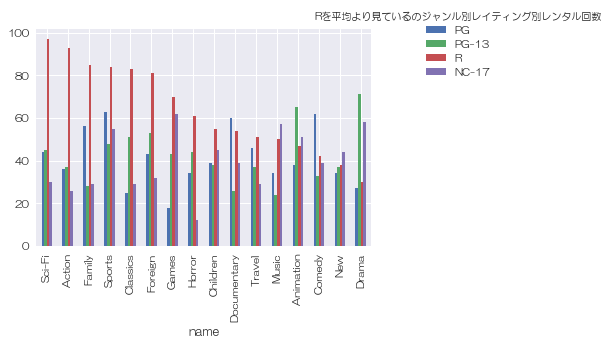

In [77]:
R_customer=R_customer.groupby(pd.Grouper(key='name')).sum()
R_customer=R_customer.sort_values(by='R',ascending=False)

dfg=plt.figure(figsize=(20, 4))
dfg=R_customer[['PG','PG-13','R','NC-17']]
dfg.plot.bar(stacked=False)
plt.legend(loc='upper right',
           bbox_to_anchor=(1.4, 1, 0.3, .100), 
           borderaxespad=0,
          title='Rを平均より見ているのジャンル別レイティング別レンタル回数')
#plt.savefig('Rを平均より見ているのジャンル別レンタル回数のレイティング割合.png')

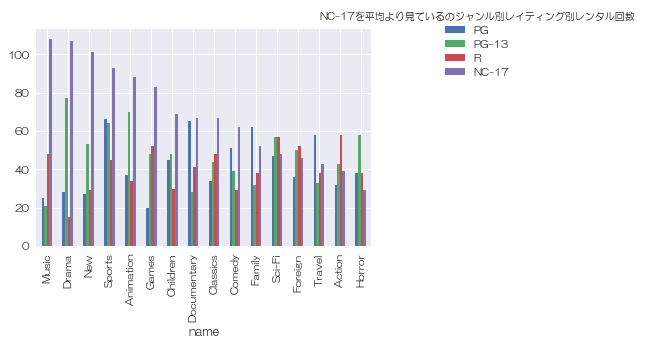

In [78]:
NC_17_customer=NC_17_customer.groupby(pd.Grouper(key='name')).sum()
NC_17_customer=NC_17_customer.sort_values(by='NC-17',ascending=False)

dfg=plt.figure(figsize=(20, 4))
dfg=NC_17_customer[['PG','PG-13','R','NC-17']]
dfg.plot.bar(stacked=False)
plt.legend(loc='upper right',
           bbox_to_anchor=(1.5, 1, 0.3, .100), 
           borderaxespad=0,
          title='NC-17を平均より見ているのジャンル別レイティング別レンタル回数')
#plt.savefig('NC-17を平均より見ているのジャンル別レンタル回数のレイティング割合.png')

# ジャンル別版

In [79]:
df_members_rental_sum['Animation'].mean(),df_members_rental_sum['Children'].mean(),df_members_rental_sum['Classics'].mean(),df_members_rental_sum['Comedy'].mean(),df_members_rental_sum['Documentary'].mean(),df_members_rental_sum['Drama'].mean(),df_members_rental_sum['Family'].mean(),df_members_rental_sum['Foreign'].mean(),df_members_rental_sum['Games'].mean(),df_members_rental_sum['Horror'].mean(),df_members_rental_sum['Music'].mean(),df_members_rental_sum['New'].mean(),df_members_rental_sum['Sci-Fi'].mean(),df_members_rental_sum['Sports'].mean(),df_members_rental_sum['Travel'].mean()

(0.8647746243739566,
 0.7595993322203672,
 0.7696160267111853,
 0.7278797996661102,
 0.7278797996661102,
 0.8430717863105175,
 0.7879799666110183,
 0.7979966611018364,
 0.6878130217028381,
 0.6243739565943238,
 0.5826377295492488,
 0.7545909849749582,
 0.8196994991652755,
 0.9532554257095158,
 0.657762938230384)

In [80]:
df_members_rental_sum.columns

Index([     'customer_id',        'Animation',         'Children',
               'Classics',           'Comedy',      'Documentary',
                  'Drama',           'Family',          'Foreign',
                  'Games',           'Horror',            'Music',
                    'New',           'Sci-Fi',           'Sports',
                 'Travel',                nan,           'amount',
        'rental_duration',      'rental_rate',           'length',
       'replacement_cost',            'NC-17',               'PG',
                  'PG-13',                'R'],
      dtype='object')

In [81]:
col_names = ["rental_id","customer_id","payment_id","inventory_id","store_id","film_id","category_id","first_name","last_name","email","address_id","activebool","create_date","active","rental_date","return_date","amount","payment_date","title","description","release_year","language_id","rental_duration","rental_rate","length","replacement_cost","rating","name","actor_id"]
df_members4 = pd.read_csv('OJT_DVD_customer7.csv',names=col_names )
df_members4.isnull().sum()
df_members4=df_members4.drop(0)

df_members4['name']=df_members4['name'].astype('category')
name=pd.get_dummies(df_members4['name'],drop_first=False, dummy_na=True)
df_members4=df_members4.drop(['name'],axis=1)
df_members4=pd.concat([name,df_members4],axis=1)
df_members4

df_members4=df_members4.dropna(subset=['rental_duration'])
df_members4['rental_date']=pd.to_datetime(df_members4['rental_date'],format='%Y-%m-%d')
df_members4['return_date']=pd.to_datetime(df_members4['return_date'],format='%Y-%m-%d')
df_members4['payment_date']=pd.to_datetime(df_members4['payment_date'],format='%Y-%m-%d')
df_members4['create_date']=pd.to_datetime(df_members4['create_date'],format='%Y-%m-%d')


df_members4['customer_id']=df_members4['customer_id'].astype('double')
df_members4['rental_id']=df_members4['rental_id'].astype('double')
df_members4['payment_id']=df_members4['payment_id'].astype('double')
df_members4['inventory_id']=df_members4['inventory_id'].astype('double')
df_members4['film_id']=df_members4['film_id'].astype('double')
df_members4['inventory_id']=df_members4['inventory_id'].astype('double')
df_members4['category_id']=df_members4['category_id'].astype('double')
df_members4['address_id']=df_members4['address_id'].astype('double')
df_members4['language_id']=df_members4['language_id'].astype('double')
#df_members['actor_id']=df_members['actor_id'].astype('double')

df_members4['amount']=df_members4['amount'].astype('double')
df_members4['release_year']=df_members4['release_year'].astype('double')


df_members4['rental_duration']=df_members4['rental_duration'].astype('double')
df_members4['rental_rate']=df_members4['rental_rate'].astype('double')
df_members4['length']=df_members4['length'].astype('double')
df_members4['replacement_cost']=df_members4['replacement_cost'].astype('double')


df_members4_customer_sum=df_members4.groupby('customer_id').sum()
df_members4_customer_sum=df_members4_customer_sum.reset_index()

In [82]:
df_members_rental_sum_Animation = df_members4_customer_sum[df_members4_customer_sum['Animation'] > 1]
df_members_rental_sum_Children = df_members4_customer_sum[df_members4_customer_sum['Children'] > 1]
df_members_rental_sum_Classics = df_members4_customer_sum[df_members4_customer_sum['Classics'] > 1]
df_members_rental_sum_Comedy = df_members4_customer_sum[df_members4_customer_sum['Comedy'] > 1]
df_members_rental_sum_Documentary = df_members4_customer_sum[df_members4_customer_sum['Documentary'] > 1]

df_members_rental_sum_Drama = df_members4_customer_sum[df_members4_customer_sum['Drama'] > 1]
df_members_rental_sum_Family = df_members4_customer_sum[df_members4_customer_sum['Family'] > 1]
df_members_rental_sum_Foreign = df_members4_customer_sum[df_members4_customer_sum['Foreign'] > 1]
df_members_rental_sum_Games = df_members4_customer_sum[df_members4_customer_sum['Games'] > 1]
df_members_rental_sum_Horror = df_members4_customer_sum[df_members4_customer_sum['Horror'] > 1]

df_members_rental_sum_Music = df_members4_customer_sum[df_members4_customer_sum['Music'] > 1]
df_members_rental_sum_New = df_members4_customer_sum[df_members4_customer_sum['New'] > 1]
df_members_rental_sum_Sci_Fi = df_members4_customer_sum[df_members4_customer_sum['Sci-Fi'] > 1]
df_members_rental_sum_Sports = df_members4_customer_sum[df_members4_customer_sum['Sports'] > 1]
df_members_rental_sum_Travel = df_members4_customer_sum[df_members4_customer_sum['Travel'] > 1]

In [83]:
Animation_customer=df_members_rental_sum_Animation['customer_id'].values.tolist()
Animation_customer=pd.DataFrame(Animation_customer)
Animation_customer=Animation_customer.rename(columns={0: 'customer_id'})
Animation_customer=pd.merge(df_members4,Animation_customer)

Children_customer=df_members_rental_sum_Children['customer_id'].values.tolist()
Children_customer=pd.DataFrame(Children_customer)
Children_customer=Children_customer.rename(columns={0: 'customer_id'})
Children_customer=pd.merge(df_members4,Children_customer)

Classics_customer=df_members_rental_sum_Classics['customer_id'].values.tolist()
Classics_customer=pd.DataFrame(Classics_customer)
Classics_customer=Classics_customer.rename(columns={0: 'customer_id'})
Classics_customer=pd.merge(df_members4,Classics_customer)

Comedy_customer=df_members_rental_sum_Comedy['customer_id'].values.tolist()
Comedy_customer=pd.DataFrame(Comedy_customer)
Comedy_customer=Comedy_customer.rename(columns={0: 'customer_id'})
Comedy_customer=pd.merge(df_members4,Comedy_customer)

In [84]:
Animation_customer.columns

Index([          'Action',        'Animation',         'Children',
               'Classics',           'Comedy',      'Documentary',
                  'Drama',           'Family',          'Foreign',
                  'Games',           'Horror',            'Music',
                    'New',           'Sci-Fi',           'Sports',
                 'Travel',                nan,        'rental_id',
            'customer_id',       'payment_id',     'inventory_id',
               'store_id',          'film_id',      'category_id',
             'first_name',        'last_name',            'email',
             'address_id',       'activebool',      'create_date',
                 'active',      'rental_date',      'return_date',
                 'amount',     'payment_date',            'title',
            'description',     'release_year',      'language_id',
        'rental_duration',      'rental_rate',           'length',
       'replacement_cost',           'rating',         'actor_

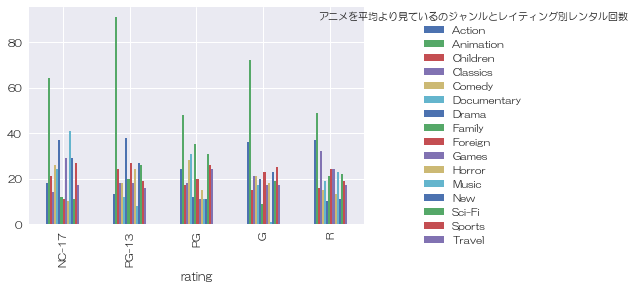

In [85]:
Animation_customer=Animation_customer.groupby(pd.Grouper(key='rating')).sum()
Animation_customer=Animation_customer.sort_values(by='rental_rate',ascending=False)

dfg=plt.figure(figsize=(20, 4))
dfg=Animation_customer[[ 'Action',        'Animation',         'Children',
               'Classics',           'Comedy',      'Documentary',
                  'Drama',           'Family',          'Foreign',
                  'Games',           'Horror',            'Music',
                    'New',           'Sci-Fi',           'Sports',
                 'Travel',]]
dfg.plot.bar(stacked=False)
plt.legend(loc='upper right',
           bbox_to_anchor=(1.5, 0.9, 0.3, .100), 
           borderaxespad=0,
         title='アニメを平均より見ているのジャンルとレイティング別レンタル回数')
plt.savefig('アニメを平均より見ているのジャンルとレイティング別レンタル回数.png')

In [86]:
Animation_customer=Animation_customer.groupby(pd.Grouper(key='rating')).sum()
Animation_customer=Animation_customer.sort_values(by='rental_rate',ascending=False)

dfg=plt.figure(figsize=(20, 4))
dfg=Animation_customer[['PG','PG-13','R','NC-17']]
dfg.plot.bar(stacked=False)
plt.legend(loc='upper right',
           bbox_to_anchor=(1.5, 0.9, 0.3, .100), 
           borderaxespad=0,
          title='アニメを平均より見ているのジャンルとレイティング別レンタル回数')
plt.savefig('アニメを平均より見ているのジャンルとレイティング別レンタル回数.png')

KeyError: 'The grouper name rating is not found'

In [ ]:
Animation_customer.columns

In [87]:
Children_customer=Children_customer.groupby(pd.Grouper(key='name')).sum()
Children_customer=Children_customer.sort_values(by='rental_rate',ascending=False)

dfg=plt.figure(figsize=(20, 4))
dfg=Children_customer[['PG','PG-13','R','NC-17']]
dfg.plot.bar(stacked=False)
plt.legend(loc='upper right',
           bbox_to_anchor=(1.5, 0.9, 0.3, .100), 
           borderaxespad=0,
          title='PGを平均より見ているのジャンル別レンタル回数のレイティング割合')
#plt.savefig('PGを平均より見ているのジャンル別レンタル回数のレイティング割合.png')

KeyError: 'The grouper name name is not found'

In [88]:
Children_customer

,Action,Animation,Children,Classics,Comedy,Documentary,Drama,Family,Foreign,Games,...,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,actor_id
0,0,0,1,0,0,0,0,0,0,0,...,Giant Troopers,A Fateful Display of a Feminist And a Monkey w...,2006.0,1.0,5.0,2.99,102.0,10.99,R,NaN
1,0,0,0,0,1,0,0,0,0,0,...,Life Twisted,A Thrilling Reflection of a Teacher And a Comp...,2006.0,1.0,4.0,2.99,137.0,9.99,NC-17,NaN
2,0,0,0,0,0,0,0,0,0,0,...,Married Go,A Fanciful Story of a Womanizer And a Dog who ...,2006.0,1.0,7.0,2.99,114.0,22.99,G,NaN
3,0,0,0,0,0,0,0,0,0,0,...,Groove Fiction,A Unbelieveable Reflection of a Moose And a A ...,2006.0,1.0,6.0,0.99,111.0,13.99,NC-17,NaN
4,0,0,0,0,0,0,1,0,0,0,...,Racer Egg,A Emotional Display of a Monkey And a Waitress...,2006.0,1.0,7.0,2.99,147.0,19.99,NC-17,NaN
5,1,0,0,0,0,0,0,0,0,0,...,Berets Agent,A Taut Saga of a Crocodile And a Boy who must ...,2006.0,1.0,5.0,2.99,77.0,24.99,PG-13,NaN
6,0,0,0,0,0,0,0,0,0,0,...,Identity Lover,A Boring Tale of a Composer And a Mad Cow who ...,2006.0,1.0,4.0,2.99,119.0,12.99,PG-13,NaN
7,0,0,1,0,0,0,0,0,0,0,...,Noon Papi,A Unbelieveable Character Study of a Mad Scien...,2006.0,1.0,5.0,2.99,57.0,12.99,G,NaN
8,0,0,0,0,0,1,0,0,0,0,...,National Story,A Taut Epistle of a Mad Scientist And a Girl w...,2006.0,1.0,4.0,2.99,92.0,19.99,NC-17,NaN
9,0,0,0,0,0,0,1,0,0,0,...,Goldfinger Sensibility,A Insightful Drama of a Mad Scientist And a Hu...,2006.0,1.0,3.0,0.99,93.0,29.99,G,NaN


In [89]:
Animation_customer

,Action,Animation,Children,Classics,Comedy,Documentary,Drama,Family,Foreign,Games,...,category_id,address_id,amount,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,actor_id
rating,,,,,,,,,,,,,,,,,,,,,
NC-17,18,64,21,14,26,24,37,12,11,29,...,3093.0,116478.0,1664.09,784346.0,391.0,2025.0,1225.09,44602.0,7889.09,0.0
PG-13,13,91,24,18,18,12,38,20,27,18,...,2966.0,120164.0,1694.01,800394.0,399.0,1939.0,1143.01,48254.0,8123.01,0.0
PG,24,48,17,18,28,31,12,35,20,11,...,2871.0,110600.0,1581.36,726172.0,362.0,1800.0,1114.38,40108.0,6985.38,0.0
G,36,72,15,21,21,17,20,9,23,17,...,2527.0,102795.0,1507.45,710124.0,354.0,1694.0,990.46,38742.0,7158.46,0.0
R,37,49,16,32,15,19,10,21,24,24,...,2621.0,102778.0,1396.50,706112.0,352.0,1639.0,960.48,42088.0,7234.48,0.0


In [90]:
cross=pd.crosstab([df_members['Animation'],df_members['Children'],df_members['Classics'],df_members['Comedy'],
             df_members['Documentary'],df_members['Drama'],df_members['Family'],df_members['Foreign'],df_members['Games'],
             df_members['Horror'],df_members['Music'],df_members['New'],df_members['Sci-Fi'],df_members['Sports'],
             df_members['Travel']], [df_members['PG'], df_members['PG-13'],df_members['R'],df_members['NC-17']], margins=True, normalize=True)

KeyError: 'All'

In [91]:
cross.reset_index()

NameError: name 'cross' is not defined

In [92]:
df_members_rental_mean[['rental_rate','nissu',]]

KeyError: "['nissu'] not in index"

# クラスタ分析したかった

In [93]:
# 標準化のためのクラス
from sklearn.preprocessing import StandardScaler

In [94]:
df_members_rental_sum2=df_members_rental_sum.reset_index()

In [95]:
city = df_members_rental_sum2['customer_id'].values


In [108]:
feature_x = ['Animation','Children','Classics','Comedy','Documentary', 'Drama','Family','Foreign','Games','Horror','Music','New','Sci-Fi','Sports','Travel','NC-17','PG','PG-13','R']

# 主成分分析

In [109]:
from sklearn.decomposition import PCA

In [110]:
# モデリング
pca = PCA()
decomposed = pca.fit_transform(df_members_rental_sum2[feature_x])
decomposed.shape

(599, 19)

In [111]:
df_members_rental_sum2

,index,customer_id,Animation,Children,Classics,Comedy,Documentary,Drama,Family,Foreign,...,nan,amount,rental_duration,rental_rate,length,replacement_cost,NC-17,PG,PG-13,R
0,0,1.0,1,0,3,3,0,2,0,1,...,0,83.80,100.0,65.80,2480.0,422.80,5,4,5,3
1,1,2.0,2,1,3,0,1,0,0,0,...,0,72.85,72.0,36.85,1879.0,311.85,4,3,2,3
2,2,3.0,2,0,1,2,1,1,1,0,...,0,74.84,82.0,51.84,1791.0,328.84,0,2,4,6
3,3,4.0,1,1,0,2,0,0,0,2,...,0,38.87,62.0,32.87,1546.0,235.87,1,4,2,1
4,4,5.0,2,0,4,1,0,1,2,1,...,0,64.83,86.0,44.83,2096.0,350.83,3,6,3,4
5,5,6.0,1,2,0,0,0,2,0,1,...,0,31.88,60.0,17.88,1194.0,266.88,3,2,3,3
6,6,7.0,1,0,0,1,1,0,2,0,...,0,64.85,69.0,42.85,1666.0,288.85,2,4,4,3
7,7,8.0,1,0,2,0,1,1,0,1,...,0,50.88,60.0,35.88,1689.0,223.88,3,3,2,1
8,8,9.0,0,0,2,0,0,0,0,2,...,0,45.88,66.0,41.88,1358.0,240.88,1,2,3,3
9,9,10.0,0,0,0,1,2,1,0,1,...,0,56.88,64.0,31.88,1233.0,253.88,2,2,1,5


In [112]:
# データフレームに直しておく
cols = ['pc{}'.format(i+1) for i in range(decomposed.shape[1])] # カラム名
decomposed = pd.DataFrame(decomposed, columns=cols)

In [113]:
# 統計量
# 標準偏差が徐々に小さくなっていくことがわかる
decomposed.describe().round(3)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19
count,599.000,599.000,599.000,599.000,599.000,599.000,599.000,599.000,599.000,599.000,599.000,599.000,599.000,599.000,599.000,599.000,599.000,599.000,599.000
mean,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,0.000
std,1.792,1.658,1.618,1.537,1.020,0.984,0.966,0.934,0.900,0.894,0.881,0.869,0.860,0.822,0.794,0.784,0.780,0.748,0.342
min,-3.672,-4.030,-3.496,-3.865,-2.940,-2.861,-2.599,-2.815,-2.480,-3.058,-2.724,-2.217,-2.063,-2.416,-2.067,-2.011,-2.746,-2.334,-0.984
25%,-1.317,-1.111,-1.160,-1.000,-0.703,-0.579,-0.659,-0.664,-0.633,-0.558,-0.641,-0.560,-0.615,-0.523,-0.524,-0.515,-0.527,-0.522,-0.240
50%,-0.170,-0.162,-0.037,-0.055,0.003,-0.035,-0.076,-0.037,-0.067,0.035,-0.041,-0.068,-0.055,0.033,-0.023,-0.099,-0.012,-0.033,-0.022
75%,1.040,1.120,0.937,1.026,0.716,0.614,0.623,0.581,0.654,0.573,0.561,0.503,0.568,0.574,0.446,0.481,0.495,0.467,0.210
max,6.703,5.660,6.234,4.000,3.008,2.953,4.048,3.158,2.996,3.247,3.301,4.470,3.487,2.557,4.251,2.741,3.193,2.774,1.306


In [114]:
# 寄与率
# この主成分までを考慮することで、全体のどのくらいの変動を説明できるかの指標
# （説明力が高い成分から降順に並ぶ）
np.round(pca.explained_variance_ratio_, 3)

array([0.147, 0.126, 0.12 , 0.108, 0.048, 0.044, 0.043, 0.04 , 0.037,
       0.037, 0.036, 0.035, 0.034, 0.031, 0.029, 0.028, 0.028, 0.026,
       0.005])

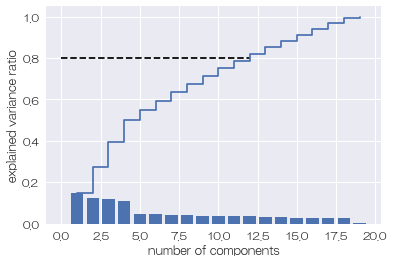

In [115]:
# 累積寄与率をプロット
# （3成分で全体の8割を説明できる）
x = range(1, len(pca.explained_variance_ratio_) + 1)                # x軸: 成分
plt.bar(x, pca.explained_variance_ratio_)                           # y軸: 寄与率（棒グラフ）
plt.step(x, np.cumsum(pca.explained_variance_ratio_), where='post') # y軸: 累積寄与率（折れ線グラフ）
plt.xlabel('number of components')
plt.ylabel('explained variance ratio')
plt.hlines(0.8, 0, 12, linestyles='dashed')

In [116]:
# 成分内の分散
np.round(pca.explained_variance_, 3)

array([3.211, 2.749, 2.619, 2.363, 1.039, 0.969, 0.934, 0.873, 0.81 ,
       0.799, 0.777, 0.755, 0.739, 0.675, 0.63 , 0.614, 0.609, 0.559,
       0.117])

In [117]:
# 成分内の標準偏差
np.round(np.sqrt(pca.explained_variance_), 3)

array([1.792, 1.658, 1.618, 1.537, 1.02 , 0.984, 0.966, 0.934, 0.9  ,
       0.894, 0.881, 0.869, 0.86 , 0.822, 0.794, 0.784, 0.78 , 0.748,
       0.342])

Text(0,0.5,'component 2')

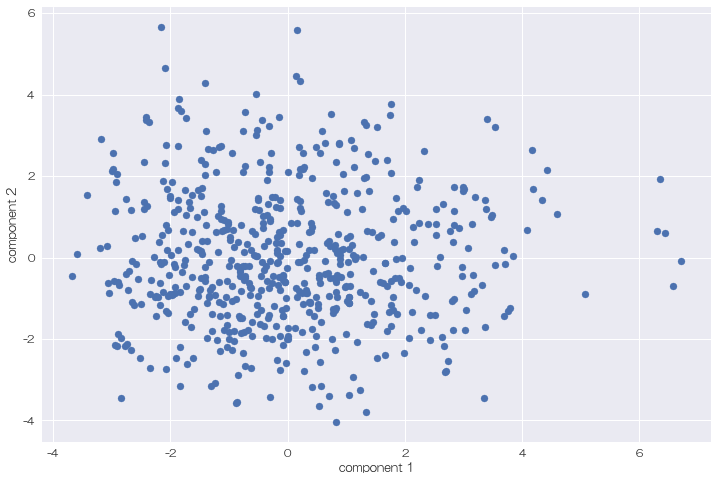

In [118]:
# 第1, 2成分を可視化
plt.figure(figsize=(12, 8))
plt.scatter(decomposed.loc[:, 'pc1'], decomposed.loc[:, 'pc2'])
plt.xlabel('component 1')
plt.ylabel('component 2')

In [119]:
# 「圧縮後の成分の次元数」×「特徴量の次元」の行列
pd.DataFrame(pca.components_, columns=feature_x, index=['pc{}'.format(i) for i, _ in enumerate(pca.components_, 1)])

,Animation,Children,Classics,Comedy,Documentary,Drama,Family,Foreign,Games,Horror,Music,New,Sci-Fi,Sports,Travel,NC-17,PG,PG-13,R
pc1,0.029648,0.083558,0.093051,0.063762,0.077542,0.041321,0.087415,0.113338,0.101267,0.085055,0.086883,0.026371,0.105579,0.141611,0.066617,-0.017524,0.501531,-0.070037,0.795670
pc2,0.060984,0.095515,0.036119,0.063370,0.042256,0.115514,0.089357,0.067426,0.018407,0.087425,0.034267,0.125016,0.013563,-0.001859,0.046619,-0.150870,0.311358,0.876305,-0.198534
pc3,0.118969,-0.006020,0.065012,0.037332,0.082263,0.107326,-0.002591,-0.005522,0.134297,0.035734,0.085026,0.146444,0.057029,0.132043,0.001124,0.893847,-0.224583,0.191241,0.084954
pc4,0.054132,0.023400,-0.051542,0.034859,0.063432,0.020833,-0.049662,-0.054421,-0.016484,0.053523,0.046389,0.015410,-0.015429,0.042414,0.025505,0.278017,0.731960,-0.338140,-0.497146
pc5,-0.493012,0.005619,0.138835,-0.101677,0.025974,-0.333319,0.025059,0.141581,0.096169,-0.027618,0.043347,0.181492,-0.425223,0.603076,-0.015677,-0.011351,-0.001217,0.030179,-0.064910
pc6,-0.634118,0.004224,-0.040591,-0.100596,-0.134357,0.641511,0.191920,-0.206401,-0.090239,0.019487,-0.053379,-0.004624,0.234780,0.063365,0.066609,0.029517,0.003593,-0.032647,-0.013025
pc7,-0.063984,-0.081748,0.301260,-0.186872,-0.229740,-0.143442,0.356352,0.194298,-0.026614,-0.109369,-0.135100,0.622068,0.034247,-0.432891,-0.060305,0.052041,0.063850,-0.092327,-0.006739
pc8,-0.182844,0.429895,-0.209643,-0.084924,0.574672,-0.051509,0.356466,-0.070100,0.091278,-0.082921,0.050249,-0.116335,-0.300855,-0.366070,-0.054433,0.070276,-0.027002,-0.014286,0.033040
pc9,-0.141464,0.648190,-0.328116,0.136956,-0.237687,-0.215128,-0.180104,0.303938,-0.246134,-0.026135,-0.100085,0.118507,0.329890,0.047962,0.025939,0.082584,-0.041386,-0.007486,-0.010688
pc10,-0.124627,-0.423853,-0.549028,-0.030757,-0.013956,-0.215745,0.302250,0.316838,0.384333,0.086590,-0.053569,-0.129862,0.280587,-0.003485,0.070059,0.034377,0.019963,0.037197,-0.048993


In [120]:
# 元の特徴量と主成分の相関を算出する
# 第1主成分は purchased_goods, pv_goods_num と相関が高いことがわかる
with pd.option_context('display.max_columns', 100):
    # 元の特徴量と主成分を横に結合
    d = pd.concat([df_members_rental_sum2, pd.DataFrame(decomposed)], axis=1)
    # 相関係数を求める
    display(d.corr().round(3))

,index,customer_id,Animation,Children,Classics,Comedy,Documentary,Drama,Family,Foreign,Games,Horror,Music,New,Sci-Fi,Sports,Travel,nan,amount,rental_duration,rental_rate,length,replacement_cost,NC-17,PG,PG-13,R,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19
index,1.000,1.000,-0.031,0.008,-0.080,0.021,-0.090,0.029,-0.012,0.028,0.016,0.040,0.037,0.023,-0.037,-0.007,0.027,NaN,0.002,-0.003,0.018,-0.056,-0.061,-0.003,0.013,0.027,-0.048,-0.034,0.040,-0.008,0.027,0.017,0.032,-0.005,-0.029,0.046,0.046,-0.019,-0.038,0.016,-0.080,-0.007,0.088,-0.011,0.044,0.003
customer_id,1.000,1.000,-0.031,0.008,-0.080,0.021,-0.090,0.029,-0.012,0.028,0.016,0.040,0.037,0.023,-0.037,-0.007,0.027,NaN,0.002,-0.003,0.018,-0.056,-0.061,-0.003,0.013,0.027,-0.048,-0.034,0.040,-0.008,0.027,0.017,0.032,-0.005,-0.029,0.046,0.046,-0.019,-0.038,0.016,-0.080,-0.007,0.088,-0.011,0.044,0.003
Animation,-0.031,-0.031,1.000,-0.030,-0.011,0.056,0.012,-0.025,-0.069,-0.012,-0.007,0.008,0.016,-0.013,0.024,-0.078,-0.032,NaN,0.202,0.224,0.211,0.204,0.202,0.155,0.078,0.096,0.031,0.055,0.105,0.200,0.087,-0.523,-0.650,-0.064,-0.178,-0.132,-0.116,0.039,0.018,0.371,-0.117,-0.008,-0.123,-0.028,-0.041,0.072
Children,0.008,0.008,-0.030,1.000,-0.021,0.023,0.020,-0.007,0.011,0.012,-0.050,0.007,0.002,-0.019,-0.027,-0.019,0.009,NaN,0.212,0.240,0.206,0.221,0.257,0.006,0.153,0.118,0.092,0.166,0.176,-0.011,0.040,0.006,0.005,-0.088,0.446,0.647,-0.421,-0.192,-0.197,0.093,-0.084,-0.143,-0.128,0.002,-0.053,0.077
Classics,-0.080,-0.080,-0.011,-0.021,1.000,-0.025,-0.045,-0.001,0.002,0.034,0.013,-0.007,0.006,0.060,-0.046,0.020,-0.008,NaN,0.209,0.258,0.195,0.250,0.242,0.071,0.057,0.085,0.165,0.186,0.067,0.117,-0.088,0.158,-0.045,0.325,-0.219,-0.329,-0.548,-0.395,0.037,-0.243,0.318,-0.014,-0.162,0.003,-0.030,0.071
Comedy,0.021,0.021,0.056,0.023,-0.025,1.000,0.034,-0.015,-0.079,-0.032,-0.005,-0.006,0.026,-0.020,0.074,0.026,0.001,NaN,0.260,0.227,0.264,0.220,0.224,0.062,0.137,0.104,0.079,0.142,0.131,0.075,0.067,-0.129,-0.123,-0.225,-0.099,0.154,-0.034,0.212,-0.084,-0.218,0.372,-0.107,0.235,-0.467,0.553,0.085
Documentary,-0.090,-0.090,0.012,0.020,-0.045,0.034,1.000,0.001,-0.014,-0.019,0.026,-0.010,0.019,-0.026,-0.076,0.008,-0.037,NaN,0.186,0.207,0.142,0.244,0.238,0.135,0.137,0.065,0.091,0.155,0.078,0.149,0.109,0.030,-0.148,-0.248,0.600,-0.239,-0.014,0.335,0.396,-0.277,0.127,0.127,-0.182,0.073,-0.098,0.089
Drama,0.029,0.029,-0.025,-0.007,-0.001,-0.015,0.001,1.000,0.018,-0.077,-0.044,0.019,-0.014,-0.017,0.098,-0.023,0.011,NaN,0.196,0.250,0.229,0.251,0.278,0.131,0.090,0.169,0.044,0.079,0.203,0.184,0.034,-0.361,0.670,-0.147,-0.051,-0.205,-0.205,-0.031,0.291,0.137,-0.278,-0.154,0.070,-0.100,0.058,0.080
Family,-0.012,-0.012,-0.069,0.011,0.002,-0.079,-0.014,0.018,1.000,0.022,0.018,-0.035,-0.017,0.038,-0.010,-0.056,-0.018,NaN,0.188,0.220,0.192,0.210,0.209,-0.013,0.103,0.139,0.140,0.176,0.167,-0.005,-0.086,0.029,0.213,0.388,0.375,-0.182,0.304,-0.096,-0.151,0.537,0.318,0.101,-0.090,-0.059,0.140,0.087
Foreign,0.028,0.028,-0.012,0.012,0.034,-0.032,-0.019,-0.077,0.022,1.000,0.007,-0.018,-0.046,0.011,0.002,0.024,-0.006,NaN,0.162,0.221,0.183,0.244,0.202,-0.017,0.109,0.113,0.176,0.227,0.125,-0.010,-0.094,0.161,-0.227,0.210,-0.073,0.306,0.317,-0.390,0.638,-0.017,-0.097,-0.024,0.151,-0.023,0.064,0.081


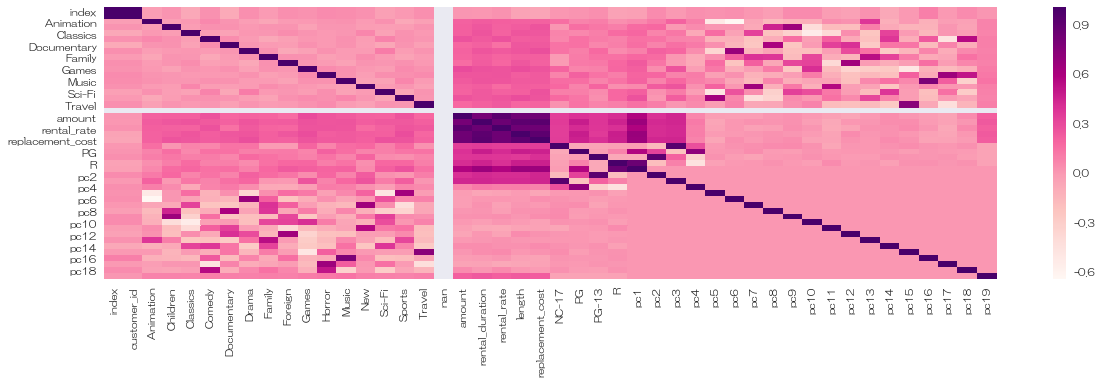

In [121]:
plt.figure(figsize=(20, 5))
sns.heatmap(d.corr().round(3), cmap=mpl.cm.RdPu)

In [122]:
d.corr().round(3)

,index,customer_id,Animation,Children,Classics,Comedy,Documentary,Drama,Family,Foreign,...,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19
index,1.000,1.000,-0.031,0.008,-0.080,0.021,-0.090,0.029,-0.012,0.028,...,0.046,-0.019,-0.038,0.016,-0.080,-0.007,0.088,-0.011,0.044,0.003
customer_id,1.000,1.000,-0.031,0.008,-0.080,0.021,-0.090,0.029,-0.012,0.028,...,0.046,-0.019,-0.038,0.016,-0.080,-0.007,0.088,-0.011,0.044,0.003
Animation,-0.031,-0.031,1.000,-0.030,-0.011,0.056,0.012,-0.025,-0.069,-0.012,...,-0.116,0.039,0.018,0.371,-0.117,-0.008,-0.123,-0.028,-0.041,0.072
Children,0.008,0.008,-0.030,1.000,-0.021,0.023,0.020,-0.007,0.011,0.012,...,-0.421,-0.192,-0.197,0.093,-0.084,-0.143,-0.128,0.002,-0.053,0.077
Classics,-0.080,-0.080,-0.011,-0.021,1.000,-0.025,-0.045,-0.001,0.002,0.034,...,-0.548,-0.395,0.037,-0.243,0.318,-0.014,-0.162,0.003,-0.030,0.071
Comedy,0.021,0.021,0.056,0.023,-0.025,1.000,0.034,-0.015,-0.079,-0.032,...,-0.034,0.212,-0.084,-0.218,0.372,-0.107,0.235,-0.467,0.553,0.085
Documentary,-0.090,-0.090,0.012,0.020,-0.045,0.034,1.000,0.001,-0.014,-0.019,...,-0.014,0.335,0.396,-0.277,0.127,0.127,-0.182,0.073,-0.098,0.089
Drama,0.029,0.029,-0.025,-0.007,-0.001,-0.015,0.001,1.000,0.018,-0.077,...,-0.205,-0.031,0.291,0.137,-0.278,-0.154,0.070,-0.100,0.058,0.080
Family,-0.012,-0.012,-0.069,0.011,0.002,-0.079,-0.014,0.018,1.000,0.022,...,0.304,-0.096,-0.151,0.537,0.318,0.101,-0.090,-0.059,0.140,0.087
Foreign,0.028,0.028,-0.012,0.012,0.034,-0.032,-0.019,-0.077,0.022,1.000,...,0.317,-0.390,0.638,-0.017,-0.097,-0.024,0.151,-0.023,0.064,0.081


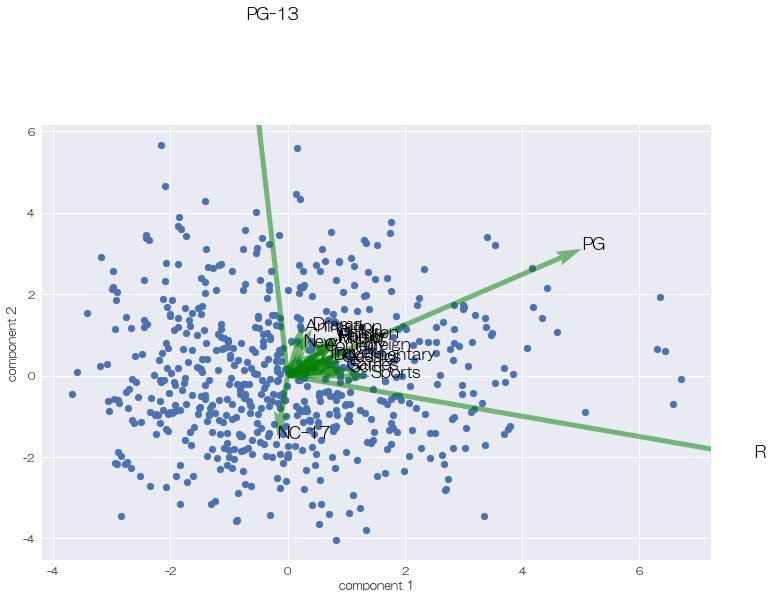

In [123]:
# 第1, 2成分を可視化
plt.figure(figsize=(12, 8))
plt.scatter(decomposed.iloc[:, 0], decomposed.iloc[:, 1])
plt.xlabel('component 1')
plt.ylabel('component 2')

# 特徴量のラベルとベクトルをプロットする
xy_all = pca.components_[:2, :].T
for idx, xy in enumerate(xy_all):
    # 図をわかりやすくするためにベクトルを10倍にする
    x, y = xy * 10
    # 特徴量のラベルをプロット
    if idx in [0, 10]:
        plt.text(x, y+0.5, s=str(feature_x[idx]), color='black', fontsize=15)
    elif idx == 11:
        plt.text(x, y-0.5, s=str(feature_x[idx]), color='black', fontsize=15)
    else:
        plt.text(x, y, s=str(feature_x[idx]), color='black', fontsize=15)
    # ベクトルをプロット
    plt.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1, alpha=0.5, color='green')


 # k-means

In [124]:
from sklearn.cluster import KMeans

In [125]:
###### モデリング
clf = KMeans(n_clusters=5, random_state=10)

# ここではPCAによる変換を行う前のデータに対して実行することに注意
clf.fit(df_members_rental_sum2[feature_x])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

In [126]:
# クラスタ
cluster = clf.labels_
df_members_rental_sum2['cluster'] = clf.labels_
cluster

array([3, 3, 0, 4, 4, 0, 4, 3, 0, 0, 0, 1, 4, 2, 0, 2, 1, 1, 1, 0, 4, 1,
       4, 1, 3, 3, 2, 4, 2, 0, 1, 3, 1, 0, 0, 3, 4, 2, 3, 0, 2, 4, 1, 3,
       0, 3, 0, 2, 1, 2, 4, 0, 1, 3, 1, 2, 4, 1, 1, 3, 1, 1, 1, 4, 3, 4,
       1, 1, 4, 1, 0, 3, 1, 1, 0, 3, 1, 0, 3, 2, 3, 2, 2, 3, 1, 4, 1, 1,
       4, 2, 3, 3, 1, 3, 1, 1, 3, 2, 3, 1, 4, 0, 0, 1, 3, 1, 0, 1, 0, 1,
       0, 3, 1, 1, 4, 2, 0, 1, 4, 3, 2, 4, 1, 1, 0, 4, 1, 3, 0, 2, 4, 3,
       2, 3, 0, 1, 3, 0, 0, 1, 4, 0, 1, 4, 1, 4, 3, 0, 1, 3, 1, 1, 3, 2,
       1, 1, 0, 2, 1, 4, 3, 4, 2, 3, 1, 1, 4, 2, 0, 2, 0, 4, 2, 1, 2, 4,
       4, 0, 2, 1, 4, 3, 1, 2, 1, 0, 0, 4, 4, 4, 1, 1, 3, 4, 0, 2, 2, 2,
       2, 1, 3, 2, 1, 2, 1, 2, 3, 4, 0, 1, 4, 0, 0, 3, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 2, 0, 3, 0, 3, 1, 0, 0, 1, 2, 0, 2, 1, 2, 2, 2, 0,
       2, 2, 2, 1, 1, 1, 0, 1, 4, 0, 4, 0, 1, 3, 0, 2, 4, 2, 1, 0, 4, 4,
       3, 3, 3, 2, 2, 3, 3, 1, 4, 2, 4, 4, 2, 1, 3, 2, 1, 1, 0, 4, 1, 4,
       4, 1, 4, 1, 1, 4, 1, 4, 3, 1, 1, 1, 0, 0, 1,

Text(0,0.5,'component 2')

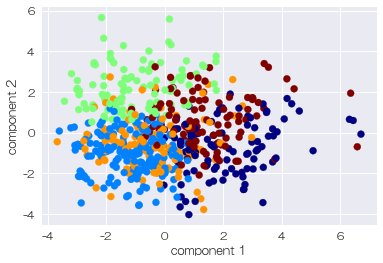

In [127]:
## 第1, 2成分を可視化（クラスタで色分け）
plt.scatter(decomposed.iloc[:, 0], decomposed.iloc[:, 1], c=cluster, cmap=mpl.cm.jet)
plt.xlabel('component 1')
plt.ylabel('component 2')


In [128]:
#クラスター毎の平均を求める
df_members_rental_sum2['cluster'] = cluster
customer_normalized_mean = df_members_rental_sum2.groupby('cluster')[feature_x].mean().T
customer_normalized_mean
#0がめっちゃよく借りる人でスポーツとゲーム大好き。1があんまり借りない人。2がまぁまぁ借りる人でPGとR大好き、SFと海外作品を特によく見る人。
#3がまぁまぁ借りる人でPG-13とNC-17大好き,スポーツと新作とドラマとアニメをよくみる人コメディクラシックも見る
#4がよく借りる人で、PG,PG-13大好き、新作と家族むけドラマ、ドキュメンタリー、子供向けアニメをよく見る

cluster,0,1,2,3,4
Animation,0.873786,0.604396,0.933333,1.12,0.990826
Children,0.883495,0.609890,0.942857,0.60,0.862385
Classics,0.941748,0.631868,0.790476,0.85,0.743119
Comedy,0.737864,0.527473,0.857143,0.78,0.880734
Documentary,0.834951,0.565934,0.761905,0.84,0.761468
Drama,0.796117,0.582418,0.933333,1.16,0.944954
Family,0.961165,0.626374,0.923810,0.64,0.899083
Foreign,1.019417,0.593407,0.914286,0.74,0.871560
Games,0.883495,0.483516,0.723810,0.85,0.660550
Horror,0.689320,0.423077,0.647619,0.67,0.834862


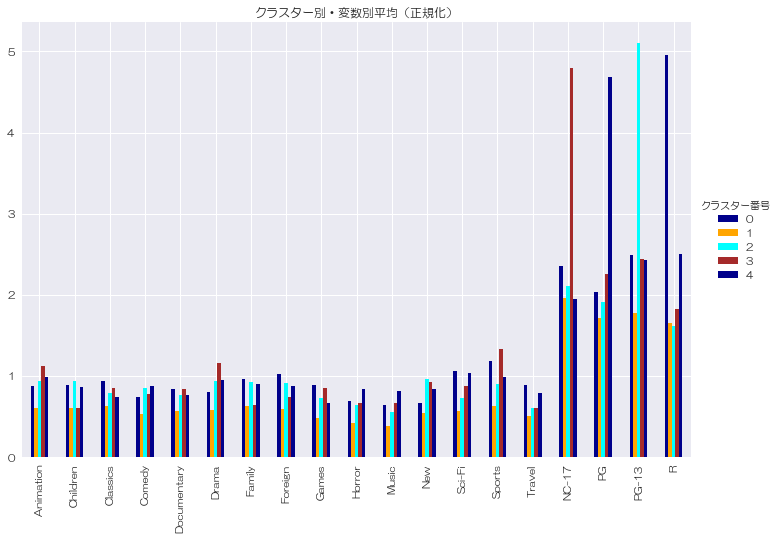

In [129]:
# 棒グラフでクラスタの特徴を把握
fig, ax = plt.subplots(figsize=(12, 8))

color_list = {'darkblue', 'cyan', 'orange', 'brown'} # 色
customer_normalized_mean.plot.bar(title='クラスター別・変数別平均（正規化）', color=color_list, ax=ax)
ax.legend(loc='center left', 
          bbox_to_anchor=(1.0, 0.5), title='クラスター番号')
#plt.savefig('ジャンルと対象年齢と合計クラスタ.png')
plt.show()


In [130]:
df_members_rental_sum.head()

,customer_id,Animation,Children,Classics,Comedy,Documentary,Drama,Family,Foreign,Games,...,nan,amount,rental_duration,rental_rate,length,replacement_cost,NC-17,PG,PG-13,R
0,1.0,1,0,3,3,0,2,0,1,0,...,0,83.80,100.0,65.80,2480.0,422.80,5,4,5,3
1,2.0,2,1,3,0,1,0,0,0,1,...,0,72.85,72.0,36.85,1879.0,311.85,4,3,2,3
2,3.0,2,0,1,2,1,1,1,0,1,...,0,74.84,82.0,51.84,1791.0,328.84,0,2,4,6
3,4.0,1,1,0,2,0,0,0,2,0,...,0,38.87,62.0,32.87,1546.0,235.87,1,4,2,1
4,5.0,2,0,4,1,0,1,2,1,1,...,0,64.83,86.0,44.83,2096.0,350.83,3,6,3,4


In [131]:
df_members_mean_nissu=df_members_rental_mean[['customer_id','nissu','rental_rate','rental_duration','replacement_cost','rental_duration','amount']].round(decimals=2)
df_members_mean_nissu.head(5)

KeyError: "['nissu'] not in index"

In [132]:
df_members_max=df_members.groupby(by='customer_id').max().head()
df_members_max=df_members_max[['nissu','rental_rate','rental_duration','replacement_cost','rental_duration','amount']].round()
df_members_max=df_members_max.reset_index()
df_members_max=df_members_max.rename(columns={'nissu': 'max_nissu','rental_rate':'max_rental_rate','rental_duration':'max_rental_duration','replacement_cost':'max_replacement_cost','rental_duration':'max_rental_duration','amount':'max_amount'})


In [133]:
df_members_min=df_members.groupby(by='customer_id').min().head()
df_members_min=df_members_min[['nissu','rental_rate','rental_duration','replacement_cost','rental_duration','amount']].round()

df_members_min=df_members_min.reset_index()
df_members_min=df_members_min.rename(columns={'nissu': 'min_nissu','rental_rate':'min_rental_rate','rental_duration':'min_rental_duration','replacement_cost':'min_replacement_cost','rental_duration':'min_rental_duration','amount':'min_amount'})


In [134]:

df_members_mean_nissu2=df_members_mean_nissu[['customer_id','nissu','rental_rate','rental_duration','replacement_cost','rental_duration','amount']].round()

df_members_mean_nissu2=df_members_mean_nissu2.rename(columns={'nissu': 'mean_nissu','rental_rate':'mean_rental_rate','rental_duration':'mean_rental_duration','replacement_cost':'mean_replacement_cost','rental_duration':'mean_rental_duration','amount':'mean_amount'})


NameError: name 'df_members_mean_nissu' is not defined

In [ ]:
display(df_members_min)
display(df_members_max)

In [ ]:
df_members_mm=pd.merge(df_members_min,df_members_max,how='inner', on='customer_id')
df_members_mm=pd.merge(df_members_mm,df_members_mean_nissu2,how='inner', on='customer_id')

In [ ]:
df_members_mmm=pd.merge(df_members_rental_sum2,df_members_mm,on='customer_id')

In [ ]:
df_members_mmm

In [ ]:
df_members_mean_nissu2